# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

# Purpose of the Project
Analyze client behavior and determine which prepaid plan brings in more revenue

## Actions to take to complete the purpose of the project
- Load libraries I may use:
    - import pandas as pd
    - import numpy as np
    - import random
    - import matplotlib.pyplot as plt
    - from math import factorial
    - from scipy import stats as st
    - from scipy. stats import norm
    - import math as mt
- Load the data and look at the data using attributes like .dtypes and methods like .info() and .head() to see if fixes or addtions need to be made
- Fix and add to the data
- Look at missing data and adjust if necessary
- Aggregate data 
- Study user behavior by looking at and understanding unique data
- Obtain the Total Revenue for the data
- perform statistical hypotheses
- Conclude my findings

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.


## Initialization

#### Loading all the libraries required for analysis

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import norm
import math as mt


## Load data

#### Loading and naming data using pd.read_csv()

In [2]:
# Load the data files into different DataFrames

# calls dataset - duration of calls in minutes
calls = pd.read_csv('/datasets/megaline_calls.csv')

# internet dataset - mb_used in megabytes
internet = pd.read_csv('/datasets/megaline_internet.csv')

# messages dataset
messages = pd.read_csv('/datasets/megaline_messages.csv')

# plans dataset - (1 GB = 1024 megabytes)
plans = pd.read_csv('/datasets/megaline_plans.csv')

# users dataset
users = pd.read_csv('/datasets/megaline_users.csv')




## Prepare the data

Get an initial understanding of the data. Do necessary corrections.

1. Use methods like .head() and .info() to understand your data
2. Look at any NaN (missing) values from your data and decide if they should should be remarked or removed
3. Look for duplicate rows and remove them
4. insert columns in desired locations

How to insert columns:
- Insert new columns (if needed) : df[‘new_column_name’] = df[‘column_name_from_used_data’]
- Insert columns in desired location: df.insert(index, ‘column’, value (df.pop(‘column_name’))


## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
display(plans)

plans.info()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
display(plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


I see exactly what is described under "**Description of the data**". All of the dtypes align with what should be used: columns 0 - 4 are integers, columns 5 & 6 are floats, and column 7 is an object. There is no missing or duplicate data.

All this data does is describe the differences between each plan: **surf** and **ultimate**

## Fix plans data

There is no obvious data to fix, but I will add a row that has `gb_per_month_included` for easy determination of GB conversion


In [5]:
# display
display(plans)

# display the data you are trying to work with
display(plans['mb_per_month_included'])

# create another column: name it what you want and use the data you are trying to work with to get the desired result
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
display(plans)

#The data was not in an ideal spot, we want to compare the mb vs the gb's that are included montly; put newly created column next to mb_per_month_included
#Use .insert() method to insert the column elsewhere and use the argument (desired location index, 'column_name'), dataset.pop('column_name')
plans.insert(2, 'gb_per_month_included', plans.pop('gb_per_month_included'))
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


0    15360
1    30720
Name: mb_per_month_included, dtype: int64

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.0,500,20,10,0.03,0.03,surf
1,1000,30720,30.0,3000,70,7,0.01,0.01,ultimate


## Enrich plans data

I enriched the data by adding `gp_per_month_included`, but I can further enrich the data by moving the `plan_name` column to the first location in the data


In [6]:
# Further enrich data by placing plan_name in the first column
plans.insert(0, 'plan_name', plans.pop('plan_name'))
display(plans)

,plan_name,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,15.0,500,20,10,0.03,0.03
1,ultimate,1000,30720,30.0,3000,70,7,0.01,0.01


Let's do this again and move `usd_monthly_pay` to the 2nd column

In [7]:
#move usd_montly pay to the second column
plans.insert(1, 'usd_monthly_pay', plans.pop('usd_monthly_pay'))
display(plans)

,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
0,surf,20,50,15360,15.0,500,10,0.03,0.03
1,ultimate,70,1000,30720,30.0,3000,7,0.01,0.01


This looks much better: plan_name --> total monthly cost in usd `usd_monthly_pay` --> what's include in the plan [text messages, data usage in mb and gb, minutes for calls] --> Extra payment if you go over your plan []

Lets also put the extra cost in the same order the included costs were: text, data usage, calls

In [8]:
# Move texts to index 6
plans.insert(6, 'usd_per_message', plans.pop('usd_per_message'))
display(plans)

,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15360,15.0,500,0.03,10,0.03
1,ultimate,70,1000,30720,30.0,3000,0.01,7,0.01


This looks much better: plan_name --> total monthly cost in usd `usd_monthly_pay` --> what's include in the plan [text messages, data usage in mb and gb, minutes for calls] --> Extra payment if you go over your plan [text messages, data usage in gb, minutes for calls]

## Users

1. Use methods like .head() and .info() to understand your data
2. Look at any NaN (missing) values from your data and decide if they should should be remarked or removed
3. Look for duplicate rows and remove them
4. insert columns in desired locations

How to insert columns:
- Insert new columns (if needed) : df[‘new_column_name’] = df[‘column_name_from_used_data’]
- Insert columns in desired location: df.insert(index, ‘column’, value (df.pop(‘column_name’))

Reminder: `churn_date` is the date users stopped their service so NaN values represent continued use

- Turn `churn_date` and `reg_date` in DateTime data type

display `users` dataset and information

In [9]:
# Print the general/summary information about the users' DataFrame
display(users)
users.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


This data for the `users` dataset make sense: There are 34 Non-missing values; this is because those 34 people discontinued their service; this means (at the time) 466 users were still in service.

However, we want to change this data from object to DateTime Attribute using `pd.to_datetime()` method

We also want to change `reg_date` to DateTime attribute. 

Print the `users` dataset 

In [10]:
# Print a sample of data for users
display(users.head(20))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


**Breakdown of what is needed:**
- change `reg_date` and `churn-date` into DateTime data types

Example of how to chage data into DateTime data type:
- position['timestamp'] = pd.to_datetime(position['timestamp'],format='%Y-%m-%dT%H:%M:%S')

Common formatting for DateTime:
- %d – day of the month (01-31)
- %m – month (01-12)
- %Y – four-digit year
- %y - two-digit year
- %H – hour in 24 hour format
- %I – hour in 12-hour format
- %M – minutes (00 – 59)
- %S – seconds(00 – 59)



### Fix Users Data

First change `reg_date` and `churn-date` into DateTime data type. 

Use  `pd.to_datetime()`


In [11]:
# Change reg_date to DateTime attribute
users['reg_date'] = pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


None

In [12]:
# Change churn_date into DateTime, first look at the data again:
display(users.head(20))

#Look at a DF with only non NaN values:
display(users[users['churn_date'].isnull() == False])

#Change churn_date into Datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format= '%Y-%m-%d')
display(users.head(20))

#Check for the change
display(users.info())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

**There are 34 users no longer in service**

Add a new column called no service to find these columns easier for later (if needed)

In [13]:
#Add a new column called in_service as a boolean mask
users['in_service'] = users['churn_date'].isnull()
display(users.head(20))

#Check to see if the display of the new column in_service is correct
display(users[users['in_service'] == False])

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,in_service
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,True


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,in_service
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,False
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,False
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07,False
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,False
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,False
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18,False
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11,False
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12,False


The result align: if the user is still in service, the column is true, if the user is no longer in service, it's labeled false

However, I do not see any clear correlations as to why the users ended their service. All users who ended their service did so in the 2nd half of the year. 

#### Find duplicate rows

In [14]:
#Check if there are any duplicate rows
display(users.duplicated().sum())

0

**There are no duplicated rows**

### Enrich Users Data

**This data for `users` is more informational about user data; therefore, the data will be left as is with the above changes**

## Calls

1. Use methods like .head() and .info() to understand your data
2. Look at any NaN (missing) values from your data and decide if they should should be remarked or removed
3. Look for duplicate rows and remove them
4. insert columns in desired locations

How to insert columns:
- Insert new columns (if needed) : df[‘new_column_name’] = df[‘column_name_from_used_data’]
- Insert columns in desired location: df.insert(index, ‘column’, value (df.pop(‘column_name’))

Reminder: change `duration` to `duration_in_min` and change `call_date` to DateTime dtype

In [15]:
# Print the general/summary information about the calls' DataFrame
display(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

In [16]:
# Print a sample of data for calls
display(calls.head())


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


- There are no duplicate values
- `call_date` should be in datetime dtype
- `duration` should be `duration_min`
- Note: user_id could be stored as an object or an integer as long as you are not performing arithmatic operations on the row, but this is usually obvious to most.

### Fix Calls data

In [17]:
#change duration to duration_min so we know the increment of measurement: use inplace= True to modify the DataFrame
calls['duration_min'] = calls['duration']
calls.drop(columns=['duration'], inplace=True)
display(calls)

,id,user_id,call_date,duration_min
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [18]:
#Check if there are any NaN value:
display(calls.isnull().sum())

id              0
user_id         0
call_date       0
duration_min    0
dtype: int64

**No NaN values**

In [19]:
#Check for duplicate rows
display(calls.duplicated().sum())

0

**No duplicated rows**

When changing `call_date` to DateTime dtype I received an error: ValueError: unconverted data remains: 7

I had to look at the excel spreadsheet to see the conversion method; the excel document used / vs. -, and it worked when formatting

In [20]:
#The excel document uses / instead of -; lets try converstion that way
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y/%m/%d')
display(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            137735 non-null  object        
 1   user_id       137735 non-null  int64         
 2   call_date     137735 non-null  datetime64[ns]
 3   duration_min  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


None

In [21]:
display(calls.head(10))

,id,user_id,call_date,duration_min
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


### Enrich Calls data

**Add a column with the minutes rounded up for each call**

In [22]:
#Lets add a column with the minutes rounded up since the users pay from minutes rounded up
calls['duration_min_up'] = np.ceil(calls['duration_min'])
display(calls.head(10))

,id,user_id,call_date,duration_min,duration_min_up
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
5,1000_388,1000,2018-12-31,2.20,3.0
6,1000_510,1000,2018-12-27,5.75,6.0
7,1000_521,1000,2018-12-28,14.18,15.0
8,1000_530,1000,2018-12-28,5.77,6.0
9,1000_544,1000,2018-12-26,4.40,5.0


## Messages

1. Use methods like .head() and .info() to understand your data
2. Look at any NaN (missing) values from your data and decide if they should should be remarked or removed
3. Look for duplicate rows and remove them
4. Change dates to DateTime dtype `message_date`



In [23]:
# Print the general/summary information about the messages' DataFrame
display(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

**There are no NaN values**

Note: `user_id` has consistently been placed as an integer

In [24]:
# Print a sample of data for messages
display(messages.head(10))
messages.sample(10, random_state=800)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


,id,user_id,message_date
16923,1112_147,1112,2018-12-25
74015,1475_149,1475,2018-09-02
24782,1146_663,1146,2018-12-16
39974,1258_522,1258,2018-12-03
70984,1462_92,1462,2018-10-21
26718,1162_94,1162,2018-10-23
23835,1144_323,1144,2018-08-03
40075,1259_103,1259,2018-12-30
36247,1241_51,1241,2018-09-09
41937,1270_41,1270,2018-10-17



There are no NaN values and `message_date` should be in DateTime dtype.


### Fix messages data

- check for duplicate rows
- change message_date to DateTime dtype


In [25]:
#Look for duplicated rows
display(messages.duplicated().sum())

0

**No duplicated values found**


In [26]:
#change message_date to DateTime dtype
messages['message_date'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')
display(messages.sample(10, random_state=800))

,id,user_id,message_date
16923,1112_147,1112,2018-12-25
74015,1475_149,1475,2018-09-02
24782,1146_663,1146,2018-12-16
39974,1258_522,1258,2018-12-03
70984,1462_92,1462,2018-10-21
26718,1162_94,1162,2018-10-23
23835,1144_323,1144,2018-08-03
40075,1259_103,1259,2018-12-30
36247,1241_51,1241,2018-09-09
41937,1270_41,1270,2018-10-17


In [27]:
#check dtypes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich messages data

Check to see how many users there are that have used text messaging services

In [28]:
#How many different users use their text messages?
display(messages['user_id'].value_counts().sort_index())

1000     11
1001    207
1002     88
1003     50
1004    177
       ... 
1491    409
1492    108
1494    174
1496     65
1497     50
Name: user_id, Length: 402, dtype: int64

**There appears to be 402 different users who texted in this data**

## Internet

1. Use methods like .head() and .info() to understand your data
2. Look at any NaN (missing) values from your data and decide if they should should be remarked or removed
3. Look for duplicate rows and remove them
4. Add a column for the amount of GB used in 1 session - 1GB = 1024 MB
5. Turn `session_date` to DateTime
6. Add a column for gb_used


In [29]:
# Print the general/summary information about the internet DataFrame
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

In [30]:
# Print a sample of data for the internet traffic
display(internet.head(10))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


- No NaN values found
- turn `session_date` to datetime dtype
- look for duplicate rows
- add `gb_used` column


### Fix internet data

In [31]:
#Look for duplicated values
display(internet.duplicated().sum())

0

**No duplicate values**


In [32]:
#turn session_date to datetime dtype
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

In [33]:
#add gb_used column
internet['gb_used'] = internet['mb_used'] / 1042

display(internet.head(10))

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.086238
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.633781
3,1000_413,1000,2018-12-26,270.99,0.260067
4,1000_442,1000,2018-12-27,880.22,0.844741
5,1001_0,1001,2018-08-24,284.68,0.273205
6,1001_3,1001,2018-12-09,656.04,0.629597
7,1001_4,1001,2018-11-04,16.97,0.016286
8,1001_10,1001,2018-11-27,135.18,0.129731
9,1001_15,1001,2018-12-13,761.92,0.731209


### Enrich internet data

Access your `session_date` column to check for patterns

In [34]:
#Display your data
display(internet)

#Check if all years are 2018
display(internet[internet['session_date'].dt.year == 2018])

#Now you don't have to worry about year b/c they are all in 2018
#Check month and day
display(internet['session_date'].dt.month.value_counts(ascending=True))

display(internet['session_date'].dt.day.value_counts(ascending=True))

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.086238
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.633781
3,1000_413,1000,2018-12-26,270.99,0.260067
4,1000_442,1000,2018-12-27,880.22,0.844741
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.209271
104821,1499_216,1499,2018-12-30,304.72,0.292438
104822,1499_217,1499,2018-09-22,292.75,0.280950
104823,1499_218,1499,2018-12-07,0.00,0.000000


,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.086238
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.633781
3,1000_413,1000,2018-12-26,270.99,0.260067
4,1000_442,1000,2018-12-27,880.22,0.844741
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.209271
104821,1499_216,1499,2018-12-30,304.72,0.292438
104822,1499_217,1499,2018-09-22,292.75,0.280950
104823,1499_218,1499,2018-12-07,0.00,0.000000


1        96
2       604
3      1336
4      2558
5      4288
6      6057
7      8110
8     10718
9     12722
10    16193
11    18651
12    23492
Name: session_date, dtype: int64

31    2351
1     3004
3     3072
2     3106
4     3110
6     3116
5     3151
9     3172
8     3185
7     3263
10    3263
15    3269
12    3312
11    3342
13    3364
16    3365
14    3440
20    3452
18    3459
19    3502
22    3528
21    3536
17    3543
23    3628
26    3654
24    3671
25    3720
27    3733
29    3780
28    3800
30    3934
Name: session_date, dtype: int64

- We checked to see (from the column length) if there was data outside of 2018, there is not. So, we do not need to worry about the year and can conclude all of this data is from 2018.

- There session use for data usage is in chronological order from least to most: session use increases throughout the year. This doesn't necessarily mean the most data is used just that there were the most sessions in these days.

- We can see that day 31 has the least amount of sessions but we could conclude that this is because the least amount of months have a day 31. 

- Although the days are not in perfect chronological order for session date for usage, we can see a general pattern that there are more sessions toward the end of the month. This could be due to users knowing their plan will recycle soon. 

In [35]:
#add a day and month column to your internet dataset
internet['session_month'] = internet['session_date'].dt.month
display(internet)

internet['session_day'] = internet['session_date'].dt.day
display(internet)

,id,user_id,session_date,mb_used,gb_used,session_month
0,1000_13,1000,2018-12-29,89.86,0.086238,12
1,1000_204,1000,2018-12-31,0.00,0.000000,12
2,1000_379,1000,2018-12-28,660.40,0.633781,12
3,1000_413,1000,2018-12-26,270.99,0.260067,12
4,1000_442,1000,2018-12-27,880.22,0.844741,12
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.209271,10
104821,1499_216,1499,2018-12-30,304.72,0.292438,12
104822,1499_217,1499,2018-09-22,292.75,0.280950,9
104823,1499_218,1499,2018-12-07,0.00,0.000000,12


,id,user_id,session_date,mb_used,gb_used,session_month,session_day
0,1000_13,1000,2018-12-29,89.86,0.086238,12,29
1,1000_204,1000,2018-12-31,0.00,0.000000,12,31
2,1000_379,1000,2018-12-28,660.40,0.633781,12,28
3,1000_413,1000,2018-12-26,270.99,0.260067,12,26
4,1000_442,1000,2018-12-27,880.22,0.844741,12,27
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.209271,10,20
104821,1499_216,1499,2018-12-30,304.72,0.292438,12,30
104822,1499_217,1499,2018-09-22,292.75,0.280950,9,22
104823,1499_218,1499,2018-12-07,0.00,0.000000,12,7


In [36]:
#Let's try to see how many GB were used by each user (user_id) in each month
display(internet.groupby('session_month').count())

#over time internet sessions increases
#Look at the gb_used column to see how much of each has been used
display(internet.groupby('gb_used').count())


#Look at user_id column
display(internet.groupby('user_id').count())


,id,user_id,session_date,mb_used,gb_used,session_day
session_month,,,,,,
1,96,96,96,96,96,96
2,604,604,604,604,604,604
3,1336,1336,1336,1336,1336,1336
4,2558,2558,2558,2558,2558,2558
5,4288,4288,4288,4288,4288,4288
6,6057,6057,6057,6057,6057,6057
7,8110,8110,8110,8110,8110,8110
8,10718,10718,10718,10718,10718,10718
9,12722,12722,12722,12722,12722,12722


,id,user_id,session_date,mb_used,session_month,session_day
gb_used,,,,,,
0.000000,13747,13747,13747,13747,13747,13747
0.000010,1,1,1,1,1,1
0.000019,2,2,2,2,2,2
0.000029,1,1,1,1,1,1
0.000038,2,2,2,2,2,2
...,...,...,...,...,...,...
1.539789,1,1,1,1,1,1
1.568512,1,1,1,1,1,1
1.570509,1,1,1,1,1,1


,id,session_date,mb_used,gb_used,session_month,session_day
user_id,,,,,,
1000,5,5,5,5,5,5
1001,245,245,245,245,245,245
1002,124,124,124,124,124,124
1003,52,52,52,52,52,52
1004,460,460,460,460,460,460
...,...,...,...,...,...,...
1495,290,290,290,290,290,290
1496,225,225,225,225,225,225
1497,31,31,31,31,31,31


In [37]:
#Let's create a pivot table
pivot_table = internet.pivot_table(index='user_id', columns='session_month', values='gb_used',aggfunc= 'sum')
display(pivot_table)

#Try grouping instead see the difference
sum_usage = internet.groupby('user_id')['gb_used'].sum()
display(sum_usage)

#See what the data looks like using pd.concat()
internet_concat = pd.concat([sum_usage], axis='columns')
display(internet_concat)

#Look at the grouped by user_id and month
monthly_usage = internet.groupby(['user_id','session_month'])['gb_used'].sum()
display(monthly_usage)

#Try with pd.concat()
monthly_usage_concat =  pd.concat([monthly_usage], axis='columns')
display(monthly_usage_concat)



session_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.824827
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.640259,12.778138,21.430413,17.758445,18.588464
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.287917,18.565336,13.815969
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.954069
1004,NaN,NaN,NaN,NaN,6.283311,19.839559,23.528426,26.853877,18.092821,13.955499,20.970038,20.527150
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.055058,25.815173,23.908618,23.126104
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.258791,15.728666,13.711478,8.202841,15.776382
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.658877


user_id
1000      1.824827
1001     77.195720
1002     38.669223
1003     25.954069
1004    150.050681
           ...    
1495     94.904952
1496     61.678157
1497     10.658877
1498    218.354251
1499     68.474309
Name: gb_used, Length: 489, dtype: float64

,gb_used
user_id,
1000,1.824827
1001,77.195720
1002,38.669223
1003,25.954069
1004,150.050681
...,...
1495,94.904952
1496,61.678157
1497,10.658877


user_id  session_month
1000     12                1.824827
1001     8                 6.640259
         9                12.778138
         10               21.430413
         11               17.758445
                            ...    
1498     12               22.205077
1499     9                12.461382
         10               18.706747
         11               16.136113
         12               21.170067
Name: gb_used, Length: 2277, dtype: float64

gb_used
user_id session_month           
1000    12              1.824827
1001    8               6.640259
        9              12.778138
        10             21.430413
        11             17.758445
...                          ...
1498    12             22.205077
1499    9              12.461382
        10             18.706747
        11             16.136113
        12             21.170067

[2277 rows x 1 columns]

`monthly_usage_concat` **gives us the monthly usage per user per month**

## Study plan conditions

In [38]:
# Print out the plan conditions and make sure they are clear for you
display(plans)


,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15360,15.0,500,0.03,10,0.03
1,ultimate,70,1000,30720,30.0,3000,0.01,7,0.01


## Aggregate data per user


### **`calls` dataset**
- add a month column
- group the data by user_id month with id to calculate the number of calls made by each user
- save the result as `monthly_calls'
- group the data by user_id and month to calculate the number of minutes made by each user per month
- save the result in `monthly_minutes`

In [39]:
# Calculate the number of calls made by each user per month. Save the result.
display(calls)

#Add a month column
calls['month'] = calls['call_date'].dt.month
display(calls)

#Get monthly number of calls per user
monthly_calls = calls.groupby(['user_id','month'])['id'].count()
display(monthly_calls)

,id,user_id,call_date,duration_min,duration_min_up
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0
137731,1499_200,1499,2018-10-20,10.89,11.0
137732,1499_201,1499,2018-09-21,8.12,9.0
137733,1499_202,1499,2018-10-10,0.37,1.0


,id,user_id,call_date,duration_min,duration_min_up,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,11
137731,1499_200,1499,2018-10-20,10.89,11.0,10
137732,1499_201,1499,2018-09-21,8.12,9.0,9
137733,1499_202,1499,2018-10-10,0.37,1.0,10


user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64

In [40]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# Use the minutes rounded up since each call is for the minutes rounded up
monthly_minutes = calls.groupby(['user_id','month'])['duration_min_up'].sum()
display(monthly_minutes)

user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
                  ...  
1498     12       339.0
1499     9        346.0
         10       385.0
         11       308.0
         12       496.0
Name: duration_min_up, Length: 2258, dtype: float64

### **`messages` dataset**
- create a `month` column
- calculate the number of messages sent per user per month
- name the results `monthly_messages`

In [41]:
# Calculate the number of messages sent by each user per month. Save the result.
display(messages)

#Add a month column
messages['month'] = messages['message_date'].dt.month
display(messages.sample(10,random_state=50))

#Group user_id and month to get the count for each message with id
monthly_messages = messages.groupby(['user_id','month'])['id'].count()
display(monthly_messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,id,user_id,message_date,month
5486,1052_243,1052,2018-12-01,12
60852,1383_8,1383,2018-12-27,12
70609,1460_73,1460,2018-08-28,8
23278,1141_57,1141,2018-12-03,12
67307,1435_345,1435,2018-11-15,11
73738,1474_28,1474,2018-11-20,11
7519,1059_401,1059,2018-07-10,7
75511,1491_377,1491,2018-05-30,5
29292,1179_88,1179,2018-08-26,8
64848,1414_64,1414,2018-11-29,11


user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64

### **`internet` data**
- month and day column already added
- calculate the volume of internet traffic used by each user per month
- save the result as `internet_volume`
- This was previously done with internet_concat, but all similar data should be in one section. 

In [42]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
display(internet)

internet = internet.rename(columns={'session_month': 'month'})
display(internet)


#Get how many gb each user used for each month
internet_volume = internet.groupby(['user_id','month'])['gb_used'].sum()
display(internet_volume)



,id,user_id,session_date,mb_used,gb_used,session_month,session_day
0,1000_13,1000,2018-12-29,89.86,0.086238,12,29
1,1000_204,1000,2018-12-31,0.00,0.000000,12,31
2,1000_379,1000,2018-12-28,660.40,0.633781,12,28
3,1000_413,1000,2018-12-26,270.99,0.260067,12,26
4,1000_442,1000,2018-12-27,880.22,0.844741,12,27
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.209271,10,20
104821,1499_216,1499,2018-12-30,304.72,0.292438,12,30
104822,1499_217,1499,2018-09-22,292.75,0.280950,9,22
104823,1499_218,1499,2018-12-07,0.00,0.000000,12,7


,id,user_id,session_date,mb_used,gb_used,month,session_day
0,1000_13,1000,2018-12-29,89.86,0.086238,12,29
1,1000_204,1000,2018-12-31,0.00,0.000000,12,31
2,1000_379,1000,2018-12-28,660.40,0.633781,12,28
3,1000_413,1000,2018-12-26,270.99,0.260067,12,26
4,1000_442,1000,2018-12-27,880.22,0.844741,12,27
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.209271,10,20
104821,1499_216,1499,2018-12-30,304.72,0.292438,12,30
104822,1499_217,1499,2018-09-22,292.75,0.280950,9,22
104823,1499_218,1499,2018-12-07,0.00,0.000000,12,7


user_id  month
1000     12        1.824827
1001     8         6.640259
         9        12.778138
         10       21.430413
         11       17.758445
                    ...    
1498     12       22.205077
1499     9        12.461382
         10       18.706747
         11       16.136113
         12       21.170067
Name: gb_used, Length: 2277, dtype: float64

**Put the aggregate data together into one DataFrame so that we can see what a unique user used in a given month.**

In [43]:
# First display data, then, Merge the data for calls, minutes, messages, internet based on user_id and month

display(monthly_calls)
display(monthly_minutes)
display(monthly_messages)
display(internet_volume)



user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64

user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
                  ...  
1498     12       339.0
1499     9        346.0
         10       385.0
         11       308.0
         12       496.0
Name: duration_min_up, Length: 2258, dtype: float64

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64

user_id  month
1000     12        1.824827
1001     8         6.640259
         9        12.778138
         10       21.430413
         11       17.758445
                    ...    
1498     12       22.205077
1499     9        12.461382
         10       18.706747
         11       16.136113
         12       21.170067
Name: gb_used, Length: 2277, dtype: float64

In [44]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

#use concat to combine all of the series
data = pd.concat([monthly_calls, monthly_minutes, monthly_messages, internet_volume],axis=1)
display(data)



id  duration_min_up    id    gb_used
user_id month                                        
1000    12     16.0            124.0  11.0   1.824827
1001    8      27.0            182.0  30.0   6.640259
        9      49.0            315.0  44.0  12.778138
        10     65.0            393.0  53.0  21.430413
        11     64.0            426.0  36.0  17.758445
...             ...              ...   ...        ...
1498    12     39.0            339.0   NaN  22.205077
1499    9      41.0            346.0   NaN  12.461382
        10     53.0            385.0   NaN  18.706747
        11     45.0            308.0   NaN  16.136113
        12     65.0            496.0   NaN  21.170067

[2293 rows x 4 columns]

In [45]:
#Add the plan information

#Display the users dataset to understand what information we need 
display(users)

#Add a month column to users
users['month'] = users['reg_date'].dt.month
display(users)

#limit the users table for the information that we actually need: we only need the user_id and plan columns, but I am keeping the in_service column too
users_limited = users.drop(columns=['first_name','last_name','age','city','reg_date','churn_date'])
display(users_limited)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,in_service
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,True
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,True
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,True


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,in_service,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True,5
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,True,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,True,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,True,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,True,2


,user_id,plan,in_service,month
0,1000,ultimate,True,12
1,1001,surf,True,8
2,1002,surf,True,10
3,1003,surf,True,1
4,1004,surf,True,5
...,...,...,...,...
495,1495,surf,True,9
496,1496,surf,True,2
497,1497,ultimate,True,12
498,1498,surf,True,2


In [46]:
#Continue adding plan information:
#Create a DF with all of the available information so far; adding limited users dataset information with the concatenated data dataset
df = users_limited.merge(data, on=['user_id'])
display(df)

#Add a column to your new DF with the gb_used rounded up, keeep the old column just in case
df['gb_used_up'] = np.ceil(df['gb_used'])
display(df)

,user_id,plan,in_service,month,id,duration_min_up,id,gb_used
0,1000,ultimate,True,12,16.0,124.0,11.0,1.824827
1,1001,surf,True,8,27.0,182.0,30.0,6.640259
2,1001,surf,True,8,49.0,315.0,44.0,12.778138
3,1001,surf,True,8,65.0,393.0,53.0,21.430413
4,1001,surf,True,8,64.0,426.0,36.0,17.758445
...,...,...,...,...,...,...,...,...
2288,1498,surf,True,2,39.0,339.0,NaN,22.205077
2289,1499,surf,True,5,41.0,346.0,NaN,12.461382
2290,1499,surf,True,5,53.0,385.0,NaN,18.706747
2291,1499,surf,True,5,45.0,308.0,NaN,16.136113


,user_id,plan,in_service,month,id,duration_min_up,id,gb_used,gb_used_up
0,1000,ultimate,True,12,16.0,124.0,11.0,1.824827,2.0
1,1001,surf,True,8,27.0,182.0,30.0,6.640259,7.0
2,1001,surf,True,8,49.0,315.0,44.0,12.778138,13.0
3,1001,surf,True,8,65.0,393.0,53.0,21.430413,22.0
4,1001,surf,True,8,64.0,426.0,36.0,17.758445,18.0
...,...,...,...,...,...,...,...,...,...
2288,1498,surf,True,2,39.0,339.0,NaN,22.205077,23.0
2289,1499,surf,True,5,41.0,346.0,NaN,12.461382,13.0
2290,1499,surf,True,5,53.0,385.0,NaN,18.706747,19.0
2291,1499,surf,True,5,45.0,308.0,NaN,16.136113,17.0


In [47]:
# Continue adding plan information

#First, let's make our current df look a little better and make more sense
df.insert(8, 'plan', df.pop('plan'))
display(df)

#Now, lets rename some columns
columns=['user_id','in_service','month','number_of_calls', 'duration_call_min_up','monthly_messages','gb_used','gb_used_up','plan']
df.columns = columns
display(df)

,user_id,in_service,month,id,duration_min_up,id,gb_used,gb_used_up,plan
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate
1,1001,True,8,27.0,182.0,30.0,6.640259,7.0,surf
2,1001,True,8,49.0,315.0,44.0,12.778138,13.0,surf
3,1001,True,8,65.0,393.0,53.0,21.430413,22.0,surf
4,1001,True,8,64.0,426.0,36.0,17.758445,18.0,surf
...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,NaN,22.205077,23.0,surf
2289,1499,True,5,41.0,346.0,NaN,12.461382,13.0,surf
2290,1499,True,5,53.0,385.0,NaN,18.706747,19.0,surf
2291,1499,True,5,45.0,308.0,NaN,16.136113,17.0,surf


,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate
1,1001,True,8,27.0,182.0,30.0,6.640259,7.0,surf
2,1001,True,8,49.0,315.0,44.0,12.778138,13.0,surf
3,1001,True,8,65.0,393.0,53.0,21.430413,22.0,surf
4,1001,True,8,64.0,426.0,36.0,17.758445,18.0,surf
...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,NaN,22.205077,23.0,surf
2289,1499,True,5,41.0,346.0,NaN,12.461382,13.0,surf
2290,1499,True,5,53.0,385.0,NaN,18.706747,19.0,surf
2291,1499,True,5,45.0,308.0,NaN,16.136113,17.0,surf


In [48]:
#Continue adding plan information
#Display plan
display(plans)

#Let's get rid of columns we do not need
plans_limited = plans.drop(columns=['mb_per_month_included'])
display(plans_limited)

#This may be easier to read if we have the plans inclusion next to the additional charge Ex: put messages_included next to usd_per_message
plans_limited.insert(3,'usd_per_minute',plans_limited.pop('usd_per_minute'))

plans_limited.insert(5,'usd_per_gb',plans_limited.pop('usd_per_gb'))
display(plans_limited)

#Rename plan_name column to plan
plans_limited = plans_limited.rename(columns={'plan_name':'plan'})
display(plans_limited)

,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15360,15.0,500,0.03,10,0.03
1,ultimate,70,1000,30720,30.0,3000,0.01,7,0.01


,plan_name,usd_monthly_pay,messages_included,gb_per_month_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15.0,500,0.03,10,0.03
1,ultimate,70,1000,30.0,3000,0.01,7,0.01


,plan_name,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
0,surf,20,50,0.03,15.0,10,500,0.03
1,ultimate,70,1000,0.01,30.0,7,3000,0.01


,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
0,surf,20,50,0.03,15.0,10,500,0.03
1,ultimate,70,1000,0.01,30.0,7,3000,0.01


In [49]:
#The plans_limited dataset looks better and is ready to merge with our df dataset
display(df)

df = df.merge(plans_limited,on='plan')
display(df)

,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate
1,1001,True,8,27.0,182.0,30.0,6.640259,7.0,surf
2,1001,True,8,49.0,315.0,44.0,12.778138,13.0,surf
3,1001,True,8,65.0,393.0,53.0,21.430413,22.0,surf
4,1001,True,8,64.0,426.0,36.0,17.758445,18.0,surf
...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,NaN,22.205077,23.0,surf
2289,1499,True,5,41.0,346.0,NaN,12.461382,13.0,surf
2290,1499,True,5,53.0,385.0,NaN,18.706747,19.0,surf
2291,1499,True,5,45.0,308.0,NaN,16.136113,17.0,surf


,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,NaN,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03
2289,1499,True,5,41.0,346.0,NaN,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03
2290,1499,True,5,53.0,385.0,NaN,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03
2291,1499,True,5,45.0,308.0,NaN,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job! Great pandas usage, all your comments and conclusions are correct! Excellent explanations!

## **Revenue Calculations**

**Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). .**

In [50]:
# Calculate the monthly revenue for each user
#Look at the DF
display(df.head())

#Check for NaN values
display(df.isnull().sum())

#number_of_calls           35
#duration_call_min_up      35
#monthly_messages         487
#gb_used                   16
#gb_used_up                16

#Lets check if we can just put 0 for the NaN values
display(df[df['number_of_calls'].isna()])
display(df[df['gb_used'].isna()])
display(df[df['monthly_messages'].isna()].head())

#These NaN values can be changed to 0 as they represent no call made (therefore, no minutes used), no monthly messages made, and no internet usage (gb_used)
df = df.fillna(value=0)
display(df)

display(df.isnull().sum())

,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01


user_id                    0
in_service                 0
month                      0
number_of_calls           35
duration_call_min_up      35
monthly_messages         487
gb_used                   16
gb_used_up                16
plan                       0
usd_monthly_pay            0
messages_included          0
usd_per_minute             0
gb_per_month_included      0
usd_per_gb                 0
minutes_included           0
usd_per_message            0
dtype: int64

,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
16,1028,True,2,NaN,NaN,12.0,12.084367,13.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
161,1108,True,12,NaN,NaN,NaN,0.223772,1.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
304,1204,True,8,NaN,NaN,42.0,20.486516,21.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
305,1204,True,8,NaN,NaN,78.0,35.249568,36.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
326,1224,True,6,NaN,NaN,5.0,2.846651,3.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
426,1311,True,6,NaN,NaN,NaN,1.438417,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
704,1482,True,1,NaN,NaN,2.0,NaN,NaN,ultimate,70,1000,0.01,30.0,7,3000,0.01
961,1080,True,8,NaN,NaN,31.0,19.692649,20.0,surf,20,50,0.03,15.0,10,500,0.03
962,1080,True,8,NaN,NaN,64.0,24.471900,25.0,surf,20,50,0.03,15.0,10,500,0.03
963,1080,True,8,NaN,NaN,59.0,28.945845,29.0,surf,20,50,0.03,15.0,10,500,0.03


,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
704,1482,True,1,NaN,NaN,2.0,NaN,NaN,ultimate,70,1000,0.01,30.0,7,3000,0.01
818,1044,True,8,1.0,13.0,NaN,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03
1449,1222,True,6,2.0,14.0,2.0,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03
1847,1340,True,7,8.0,46.0,8.0,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03
1849,1340,True,7,70.0,441.0,62.0,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03
2009,1393,True,10,9.0,71.0,4.0,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03
2200,1470,True,4,28.0,240.0,51.0,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03
2201,1470,True,4,72.0,565.0,133.0,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03
2202,1470,True,4,75.0,524.0,147.0,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03
2203,1470,True,4,84.0,580.0,141.0,NaN,NaN,surf,20,50,0.03,15.0,10,500,0.03


,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
60,1041,True,3,4.0,23.0,NaN,1.522447,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
61,1041,True,3,60.0,453.0,NaN,19.771190,20.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
62,1041,True,3,54.0,407.0,NaN,17.523474,18.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
63,1041,True,3,52.0,311.0,NaN,19.225691,20.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
64,1041,True,3,65.0,533.0,NaN,22.457505,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01


,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,0.0,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03
2289,1499,True,5,41.0,346.0,0.0,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03
2290,1499,True,5,53.0,385.0,0.0,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03
2291,1499,True,5,45.0,308.0,0.0,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03


user_id                  0
in_service               0
month                    0
number_of_calls          0
duration_call_min_up     0
monthly_messages         0
gb_used                  0
gb_used_up               0
plan                     0
usd_monthly_pay          0
messages_included        0
usd_per_minute           0
gb_per_month_included    0
usd_per_gb               0
minutes_included         0
usd_per_message          0
dtype: int64

**Now, we don't have to worry about NaN values**

In [51]:
# Calculate the monthly revenue for each user continued
display(df)

#Let's rename the columns to suit this graph better; the numbers we got are the monthly numbers
df = df.rename(columns={'number_of_calls': 'monthly_number_of_calls', 'duration_call_min_up': 'monthly_min_of_call', 'gb_used_up': 'monthly_gb_used'})
display(df)

,user_id,in_service,month,number_of_calls,duration_call_min_up,monthly_messages,gb_used,gb_used_up,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,0.0,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03
2289,1499,True,5,41.0,346.0,0.0,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03
2290,1499,True,5,53.0,385.0,0.0,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03
2291,1499,True,5,45.0,308.0,0.0,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03


,user_id,in_service,month,monthly_number_of_calls,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,0.0,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03
2289,1499,True,5,41.0,346.0,0.0,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03
2290,1499,True,5,53.0,385.0,0.0,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03
2291,1499,True,5,45.0,308.0,0.0,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03


In [52]:
# Calculate the monthly revenue for each user continued
display(df)

#Note: it appears that usd_per_minute and usd_per_message should be switched, however, given they are the same values it's not a priority



monthly_min_of_call = df['monthly_min_of_call']
minutes_included = df['minutes_included']
usd_per_minute = df['usd_per_minute']

monthly_messages = df['monthly_messages']
messages_included = df['messages_included']
usd_per_message = df['usd_per_message']

monthly_gb_used = df['monthly_gb_used']
gb_per_month_included = df['gb_per_month_included']
usd_per_gb = df['usd_per_gb']


total_usage_call = (monthly_min_of_call - minutes_included) * usd_per_minute
display(total_usage_call)
total_usage_message = (monthly_messages - messages_included) * usd_per_message
display(total_usage_message)
total_usage_gb = (monthly_gb_used - gb_per_month_included) * usd_per_gb
display(total_usage_gb)


#Add the total useage per user to get the dollar amount of extra usage
df['total_usage_call'] = total_usage_call
df['total_usage_message'] = total_usage_message
df['total_usage_gb'] = total_usage_gb
display(df)

,user_id,in_service,month,monthly_number_of_calls,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,0.0,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03
2289,1499,True,5,41.0,346.0,0.0,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03
2290,1499,True,5,53.0,385.0,0.0,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03
2291,1499,True,5,45.0,308.0,0.0,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03


0      -28.76
1      -29.90
2      -29.41
3      -25.24
4      -25.54
        ...  
2288    -4.83
2289    -4.62
2290    -3.45
2291    -5.76
2292    -0.12
Length: 2293, dtype: float64

0      -9.89
1      -9.85
2      -8.61
3      -9.79
4      -9.63
        ... 
2288   -1.50
2289   -1.50
2290   -1.50
2291   -1.50
2292   -1.50
Length: 2293, dtype: float64

0      -196.0
1      -196.0
2         7.0
3       -91.0
4       -49.0
        ...  
2288     80.0
2289    -20.0
2290     40.0
2291     20.0
2292     70.0
Length: 2293, dtype: float64

,user_id,in_service,month,monthly_number_of_calls,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message,total_usage_call,total_usage_message,total_usage_gb
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-28.76,-9.89,-196.0
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-29.90,-9.85,-196.0
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-29.41,-8.61,7.0
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-25.24,-9.79,-91.0
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-25.54,-9.63,-49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,0.0,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03,-4.83,-1.50,80.0
2289,1499,True,5,41.0,346.0,0.0,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03,-4.62,-1.50,-20.0
2290,1499,True,5,53.0,385.0,0.0,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03,-3.45,-1.50,40.0
2291,1499,True,5,45.0,308.0,0.0,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03,-5.76,-1.50,20.0


In [53]:
# Calculate the monthly revenue for each user continued
display(df)

#Let's think about this: right now we have the total usages of each call, message, and gb
#If we have a negative number then the usage equals usd_monthly pay for that individual plan
#If there is a positive number then the usage equals usd_monthly_pay + each individual plan

#However, we can't just add them all because the negative numbers may mess up the true value; so,
#We want to add the usd_monthly_pay at the end
#Lets make it so all of the negative number are 0 for total_usage_call, total_usage_message, and total_usage_gb
# We want to do this b/c the negative number represents that the user did not surpass their included plan which for payment does not matter, it only matters if they overuse their plan

# This code will make all the negative numbers in our DF equal 0
df.loc[df['total_usage_call']<0,'total_usage_call'] = 0
df.loc[df['total_usage_message']<0, 'total_usage_message'] = 0
df.loc[df['total_usage_gb']<0, 'total_usage_gb'] = 0
display(df)




,user_id,in_service,month,monthly_number_of_calls,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message,total_usage_call,total_usage_message,total_usage_gb
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-28.76,-9.89,-196.0
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-29.90,-9.85,-196.0
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-29.41,-8.61,7.0
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-25.24,-9.79,-91.0
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,-25.54,-9.63,-49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,0.0,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03,-4.83,-1.50,80.0
2289,1499,True,5,41.0,346.0,0.0,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03,-4.62,-1.50,-20.0
2290,1499,True,5,53.0,385.0,0.0,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03,-3.45,-1.50,40.0
2291,1499,True,5,45.0,308.0,0.0,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03,-5.76,-1.50,20.0


,user_id,in_service,month,monthly_number_of_calls,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message,total_usage_call,total_usage_message,total_usage_gb
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,7.0
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,0.0,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03,0.0,0.0,80.0
2289,1499,True,5,41.0,346.0,0.0,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03,0.0,0.0,0.0
2290,1499,True,5,53.0,385.0,0.0,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03,0.0,0.0,40.0
2291,1499,True,5,45.0,308.0,0.0,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03,0.0,0.0,20.0


In [54]:
# Calculate the monthly revenue for each user continued
display(df.head(20))

# Now, we have all positive numbers; so, usage equals usd_monthly_pay + each individual plan
# The values in each plan are the dollar amount for what the user owes in Extra usage
# So, if total_usage_gb = 7 then they owe 7 dollars + their monthly payment
# Therefore, we want to now add up the individual users EXTRA total usages and add the usd_monthly_pay to put in one column

df['monthly_revenue'] = (df['total_usage_call']) + (df['total_usage_message']) + (df['total_usage_gb']) + (df['usd_monthly_pay'])
display(df)




,user_id,in_service,month,monthly_number_of_calls,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message,total_usage_call,total_usage_message,total_usage_gb
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,7.0
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
5,1008,True,8,85.0,634.0,26.0,14.097246,15.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
6,1011,True,1,19.0,118.0,21.0,6.415653,7.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
7,1011,True,1,63.0,499.0,53.0,20.198090,21.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
8,1011,True,1,61.0,486.0,54.0,20.248916,21.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0
9,1011,True,1,73.0,484.0,60.0,15.967812,16.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0


,user_id,in_service,month,monthly_number_of_calls,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,usd_monthly_pay,messages_included,usd_per_minute,gb_per_month_included,usd_per_gb,minutes_included,usd_per_message,total_usage_call,total_usage_message,total_usage_gb,monthly_revenue
0,1000,True,12,16.0,124.0,11.0,1.824827,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0,70.0
1,1006,False,11,2.0,10.0,15.0,1.985000,2.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0,70.0
2,1006,False,11,9.0,59.0,139.0,30.824203,31.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,7.0,77.0
3,1008,True,8,71.0,476.0,21.0,16.417457,17.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0,70.0
4,1008,True,8,63.0,446.0,37.0,22.722380,23.0,ultimate,70,1000,0.01,30.0,7,3000,0.01,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,True,2,39.0,339.0,0.0,22.205077,23.0,surf,20,50,0.03,15.0,10,500,0.03,0.0,0.0,80.0,100.0
2289,1499,True,5,41.0,346.0,0.0,12.461382,13.0,surf,20,50,0.03,15.0,10,500,0.03,0.0,0.0,0.0,20.0
2290,1499,True,5,53.0,385.0,0.0,18.706747,19.0,surf,20,50,0.03,15.0,10,500,0.03,0.0,0.0,40.0,60.0
2291,1499,True,5,45.0,308.0,0.0,16.136113,17.0,surf,20,50,0.03,15.0,10,500,0.03,0.0,0.0,20.0,40.0


**Now we have the `monthly_revenue` for each user per month**

## Study user behaviour

#### Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.

In [55]:
#Lets make the data easier to read in our df, we shouldn't need some information after we've already perfomred our operations
#Get rid of:
# in_service, monthly_number_of_calls, usd_monthly_pay, messages_included, usd_per_minute, gb_per_month_included, usd_per_gb, minutes_included, 
# and usd_per_message columns
#Use drop()
df_limited = df.drop(columns=['in_service','monthly_number_of_calls','usd_monthly_pay', 'messages_included', 'usd_per_minute', 'gb_per_month_included', 
                              'usd_per_gb', 'minutes_included', 'usd_per_message'])
display(df_limited)

,user_id,month,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,total_usage_call,total_usage_message,total_usage_gb,monthly_revenue
0,1000,12,124.0,11.0,1.824827,2.0,ultimate,0.0,0.0,0.0,70.0
1,1006,11,10.0,15.0,1.985000,2.0,ultimate,0.0,0.0,0.0,70.0
2,1006,11,59.0,139.0,30.824203,31.0,ultimate,0.0,0.0,7.0,77.0
3,1008,8,476.0,21.0,16.417457,17.0,ultimate,0.0,0.0,0.0,70.0
4,1008,8,446.0,37.0,22.722380,23.0,ultimate,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2,339.0,0.0,22.205077,23.0,surf,0.0,0.0,80.0,100.0
2289,1499,5,346.0,0.0,12.461382,13.0,surf,0.0,0.0,0.0,20.0
2290,1499,5,385.0,0.0,18.706747,19.0,surf,0.0,0.0,40.0,60.0
2291,1499,5,308.0,0.0,16.136113,17.0,surf,0.0,0.0,20.0,40.0


**That's better, now if you want to view the old `df` you can and can now access the `df_limited` for better readability**

### Calls

In [56]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
display(df_limited)

#Let's pull this data from `df_limited`
# We want the plan and the month to compare it with the average(mean) duration of calls
# Use groupby()

avg_call_group = df_limited.groupby(['month','plan'])['monthly_min_of_call'].mean()
display(avg_call_group)

#Let's try a pivot_table for readability

avg_call_pivot = df_limited.pivot_table(index= 'month', columns= 'plan', values='monthly_min_of_call', aggfunc = 'mean')
display(avg_call_pivot)

,user_id,month,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,total_usage_call,total_usage_message,total_usage_gb,monthly_revenue
0,1000,12,124.0,11.0,1.824827,2.0,ultimate,0.0,0.0,0.0,70.0
1,1006,11,10.0,15.0,1.985000,2.0,ultimate,0.0,0.0,0.0,70.0
2,1006,11,59.0,139.0,30.824203,31.0,ultimate,0.0,0.0,7.0,77.0
3,1008,8,476.0,21.0,16.417457,17.0,ultimate,0.0,0.0,0.0,70.0
4,1008,8,446.0,37.0,22.722380,23.0,ultimate,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2,339.0,0.0,22.205077,23.0,surf,0.0,0.0,80.0,100.0
2289,1499,5,346.0,0.0,12.461382,13.0,surf,0.0,0.0,0.0,20.0
2290,1499,5,385.0,0.0,18.706747,19.0,surf,0.0,0.0,40.0,60.0
2291,1499,5,308.0,0.0,16.136113,17.0,surf,0.0,0.0,20.0,40.0


month  plan    
1      surf        402.923810
       ultimate    443.223881
2      surf        494.272727
       ultimate    273.000000
3      surf        453.850829
       ultimate    473.454545
4      surf        481.004098
       ultimate    564.264706
5      surf        382.257353
       ultimate    395.189873
6      surf        420.634483
       ultimate    443.954545
7      surf        397.450450
       ultimate    375.782609
8      surf        381.695652
       ultimate    532.131148
9      surf        391.656716
       ultimate    466.342105
10     surf        369.784091
       ultimate    428.727273
11     surf        441.404762
       ultimate    324.160000
12     surf        347.280000
       ultimate    126.111111
Name: monthly_min_of_call, dtype: float64

plan,surf,ultimate
month,,
1,402.923810,443.223881
2,494.272727,273.000000
3,453.850829,473.454545
4,481.004098,564.264706
5,382.257353,395.189873
6,420.634483,443.954545
7,397.450450,375.782609
8,381.695652,532.131148
9,391.656716,466.342105


**Based on calling alone, the average calls per month would make it seem that it is not worth buying the ultimate plan - the averages are well under 3000 and are mostly even under 500 except for months 4 and 8**

**There's even 4 months (on average) where the ultimate users are spending less time on the phone then surf users 2, 7, 11, and 12**

**Surf:**

monthly cost: 20

minutes included: 500

Extra: 0.03


**Ultimate:**

monthly cost: 70

minutes included: 3000

Extra: 0.02


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job!

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Reviewer's comment v1:</b>

Although your work is well done in calculating the revenue, what you should have used is a **function**, because as you have shown a function would require only one cell of code, instead you have had to perform a series of calculations to calculate the revenue. A function saves space and work. As an extra exercise you could load a function to calculate the revenue

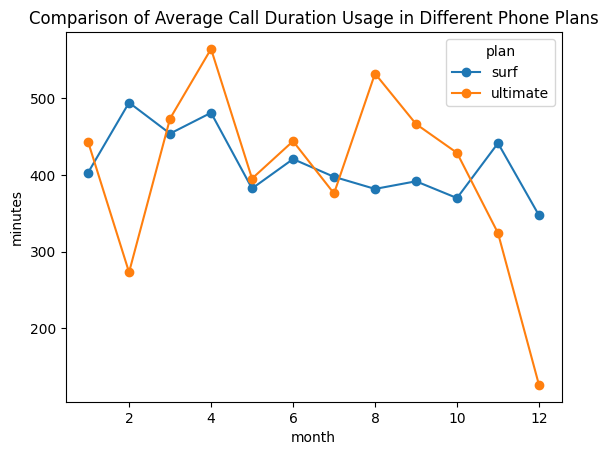

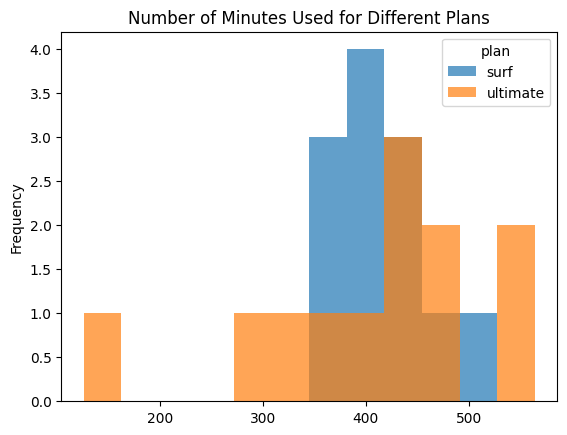

In [57]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
avg_call_pivot.plot(title="Comparison of Average Call Duration Usage in Different Phone Plans",style='o-',ylabel="minutes")
plt.show()

avg_call_pivot.plot(kind='hist',bins=12, alpha= 0.7,title="Number of Minutes Used for Different Plans",style='o-',xlabel="minutes")
plt.show()

**The line plot shows that surf users are more consistenet when using their minutes while ultimate users are more erratic in their usage.** 

This could be due to ultimate users knowing they have plenty of minutes to use (3000 vs 500) or ultimate users may have higher usage in other areas like internet or text messages.

Both seem to drop throughout the end of the year although ultimate is a more substantial drop

**The histogram paints a similar story, the frequency at which minutes are used for surf users is consistently between ~ 350-525 while ultimate users show a ranging frequency between ~125-550**

In [58]:
# Calculate the mean and the variance of the monthly call duration

display(df_limited)

#Get the mean, variance and standard deviation of the monthly call duration
mean_all = df_limited['monthly_min_of_call'].mean()
display(mean_all)
var_all = np.var(df_limited['monthly_min_of_call'])
display(var_all)
std_all = np.std(df_limited['monthly_min_of_call'])
display(std_all)

#Separate the Surf and Ultimate plans
surf_data = df_limited[df_limited['plan'] == 'surf']
display(surf_data)
ultimate_data = df_limited[df_limited['plan'] == 'ultimate']
display(ultimate_data)

#Get the mean, variance, and standard deviation of the surf data
mean_surf = surf_data['monthly_min_of_call'].mean()
display(mean_surf)
var_surf = np.var(surf_data['monthly_min_of_call'])
display(var_surf)
std_surf = np.std(surf_data['monthly_min_of_call'])
display(std_surf)

#Get the mean, variance, and standard deviation of the ultimate data
mean_ultimate = ultimate_data['monthly_min_of_call'].mean()
display(mean_ultimate)
var_ultimate = np.var(ultimate_data['monthly_min_of_call'])
display(var_ultimate)
std_ultimate = np.std(ultimate_data['monthly_min_of_call'])
display(std_ultimate)


#Write the answers accordingly
display(f"Mean for Call Duration: {mean_all}", f"Variance for Call Duration: {var_all}", f"Standard Devitation for Call Duration: {std_all}",
       f"Surf Users Mean: {mean_surf}", f"Surf Users Variance: {var_surf}", f"Surf Users Standard Deviation: {std_surf}",
       f"Ultimate Users Mean: {mean_ultimate}", f"Ultimate Users Variance: {var_ultimate}", f"Ultimate Users Standard Deviation: {std_ultimate}")


,user_id,month,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,total_usage_call,total_usage_message,total_usage_gb,monthly_revenue
0,1000,12,124.0,11.0,1.824827,2.0,ultimate,0.0,0.0,0.0,70.0
1,1006,11,10.0,15.0,1.985000,2.0,ultimate,0.0,0.0,0.0,70.0
2,1006,11,59.0,139.0,30.824203,31.0,ultimate,0.0,0.0,7.0,77.0
3,1008,8,476.0,21.0,16.417457,17.0,ultimate,0.0,0.0,0.0,70.0
4,1008,8,446.0,37.0,22.722380,23.0,ultimate,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2,339.0,0.0,22.205077,23.0,surf,0.0,0.0,80.0,100.0
2289,1499,5,346.0,0.0,12.461382,13.0,surf,0.0,0.0,0.0,20.0
2290,1499,5,385.0,0.0,18.706747,19.0,surf,0.0,0.0,40.0,60.0
2291,1499,5,308.0,0.0,16.136113,17.0,surf,0.0,0.0,20.0,40.0


429.2834714348016

55822.82326365782

236.2685405712276

,user_id,month,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,total_usage_call,total_usage_message,total_usage_gb,monthly_revenue
720,1001,8,182.0,30.0,6.640259,7.0,surf,0.0,0.00,0.0,20.00
721,1001,8,315.0,44.0,12.778138,13.0,surf,0.0,0.00,0.0,20.00
722,1001,8,393.0,53.0,21.430413,22.0,surf,0.0,0.09,70.0,90.09
723,1001,8,426.0,36.0,17.758445,18.0,surf,0.0,0.00,30.0,50.00
724,1001,8,412.0,44.0,18.588464,19.0,surf,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2,339.0,0.0,22.205077,23.0,surf,0.0,0.00,80.0,100.00
2289,1499,5,346.0,0.0,12.461382,13.0,surf,0.0,0.00,0.0,20.00
2290,1499,5,385.0,0.0,18.706747,19.0,surf,0.0,0.00,40.0,60.00
2291,1499,5,308.0,0.0,16.136113,17.0,surf,0.0,0.00,20.0,40.00


,user_id,month,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,total_usage_call,total_usage_message,total_usage_gb,monthly_revenue
0,1000,12,124.0,11.0,1.824827,2.0,ultimate,0.0,0.0,0.0,70.0
1,1006,11,10.0,15.0,1.985000,2.0,ultimate,0.0,0.0,0.0,70.0
2,1006,11,59.0,139.0,30.824203,31.0,ultimate,0.0,0.0,7.0,77.0
3,1008,8,476.0,21.0,16.417457,17.0,ultimate,0.0,0.0,0.0,70.0
4,1008,8,446.0,37.0,22.722380,23.0,ultimate,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
715,1493,3,529.0,0.0,14.386919,15.0,ultimate,0.0,0.0,0.0,70.0
716,1493,3,450.0,0.0,15.671372,16.0,ultimate,0.0,0.0,0.0,70.0
717,1493,3,500.0,0.0,15.000749,16.0,ultimate,0.0,0.0,0.0,70.0
718,1493,3,473.0,0.0,14.672831,15.0,ultimate,0.0,0.0,0.0,70.0


428.7495232040687

54933.334591317485

234.37861376695076

430.45

57764.12527777777

240.34168443650753

'Mean for Call Duration: 429.2834714348016'

'Variance for Call Duration: 55822.82326365782'

'Standard Devitation for Call Duration: 236.2685405712276'

'Surf Users Mean: 428.7495232040687'

'Surf Users Variance: 54933.334591317485'

'Surf Users Standard Deviation: 234.37861376695076'

'Ultimate Users Mean: 430.45'

'Ultimate Users Variance: 57764.12527777777'

'Ultimate Users Standard Deviation: 240.34168443650753'

**All** data for call Duration

- Mean: **429.2834714348016**
- Variance: **55822.82326365782**
- Standard Devitation: **236.2685405712276**

**Surf plan:**
- Mean: **428.7495232040687**
- Variance: **54933.334591317485**
- Standard Deviation: **234.37861376695076**

**Ultimate plan:**
- Mean: **430.45**
- Variance: **57764.12527777777**
- Standard Deviation: **240.34168443650753**

The mean is very similar between the dataset: ~ 428.7 - 430.5

The standard deviation is also very similar: ~ 234.3 - 240.4

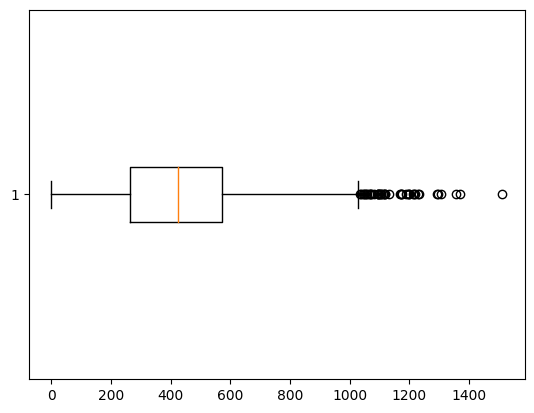

425.0

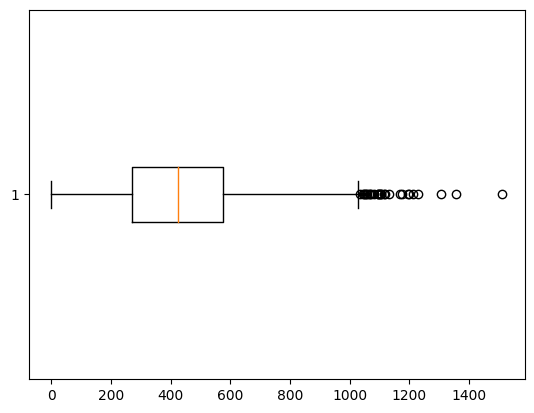

425.0

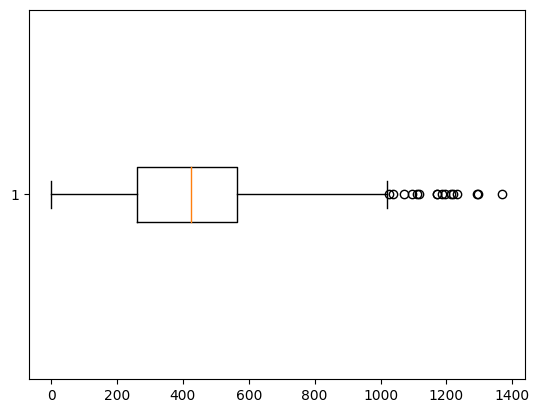

424.0

In [59]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.boxplot(df_limited['monthly_min_of_call'], vert=False)
plt.show()

median_all = np.median(df_limited['monthly_min_of_call'])
display(median_all)

#Surf data
plt.boxplot(surf_data['monthly_min_of_call'], vert=False)
plt.show()

surf_median = np.median(surf_data['monthly_min_of_call'])
display(surf_median)

#Ultimate data
plt.boxplot(ultimate_data['monthly_min_of_call'], vert=False)
plt.show()

ultimate_median = np.median(ultimate_data['monthly_min_of_call'])
display(ultimate_median)

**All box plots are are skewed right**

- Most users in all categories spend less than 1100 minutes on the phone. That extra cost on the surf plan would be 3 dollars per month; which is not enough to justify spending an extra 50 dollars on the ultimate plan

The data shows that on average, users of both plans have a similar call duration:
- all users: 429.28
- surf users: 428.75
- ultimate users: 430.45

The median numbers are almost identical.

There is high dispersion:
- all users: ~236 minutes
- surf users: ~234 minute
- ultimate users: ~240 minutes

When comparing the data month to month:
- surf users were more consistent in usage for duration of their calls
- ultimate users were more eratic in usage for duration of their calls

A possible reason that ultimate users are more erratic is that they do not have to worry about their usage; therefore, they do not need to get on or off the phone to "waste minutes".

Another reason, we have not looked at the way age effects this data; maybe surf users are older and tend to favor calling which is why it may be more consistent. We would also need to compare the data to other usages like text and internet.


However, with the high dispersion and the right skew, its seems many users need to switch plans

The highest number of minutes used for the ultimate plan was about 1400. This would be about 1100 minutes over. Let's see how much this would be for a surf user (1100 * 0.03 = 33). 33 dollars is pretty high by itself so if this ultimate user ONLY went over on calls and nowhere else then they could switch to the surf plan and pay less. 


### Messages

In [60]:
# Compare the number of messages users of each plan tend to send each month
display(df_limited)

#Use a pivot_table
avg_message_pivot = df_limited.pivot_table(index='month',columns='plan',values='monthly_messages', aggfunc='mean')
display(avg_message_pivot)



,user_id,month,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,total_usage_call,total_usage_message,total_usage_gb,monthly_revenue
0,1000,12,124.0,11.0,1.824827,2.0,ultimate,0.0,0.0,0.0,70.0
1,1006,11,10.0,15.0,1.985000,2.0,ultimate,0.0,0.0,0.0,70.0
2,1006,11,59.0,139.0,30.824203,31.0,ultimate,0.0,0.0,7.0,77.0
3,1008,8,476.0,21.0,16.417457,17.0,ultimate,0.0,0.0,0.0,70.0
4,1008,8,446.0,37.0,22.722380,23.0,ultimate,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2,339.0,0.0,22.205077,23.0,surf,0.0,0.0,80.0,100.0
2289,1499,5,346.0,0.0,12.461382,13.0,surf,0.0,0.0,0.0,20.0
2290,1499,5,385.0,0.0,18.706747,19.0,surf,0.0,0.0,40.0,60.0
2291,1499,5,308.0,0.0,16.136113,17.0,surf,0.0,0.0,20.0,40.0


plan,surf,ultimate
month,,
1,30.052381,26.462687
2,32.210526,29.534247
3,25.375691,13.072727
4,35.254098,64.058824
5,23.977941,38.531646
6,24.848276,45.745455
7,37.477477,46.478261
8,41.817391,49.491803
9,24.253731,35.315789


- Surf(included) = 50 texts
- Ultimate(included) = 1000 texts

- Ultimate users used less texts on month 1,2,3,,10,12 (on average)
- That's 5 out of the 12 months

- Ultimate users (on average) rarely surpass the monthly limit set for surf users except for month 4
- Comparing this average data to the call duration average data, so far, it seems the ultimate plan is not worth 50 extra dollars a month for the extra limits for the average user

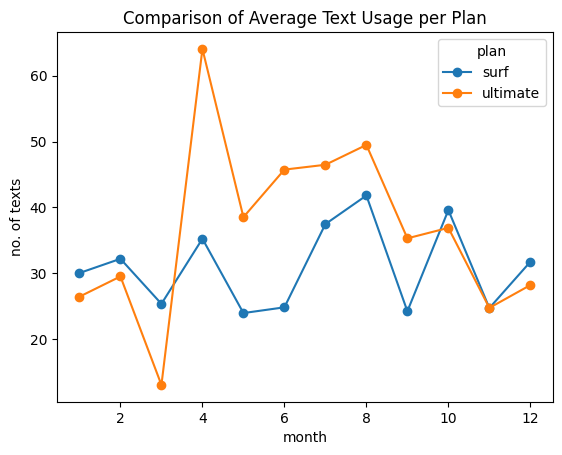

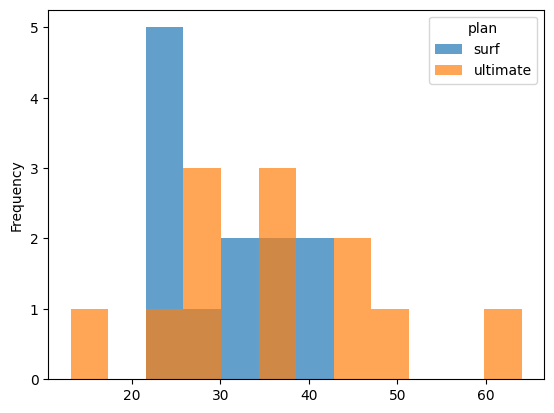

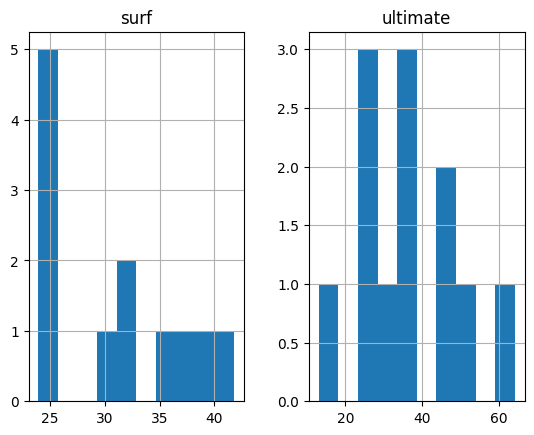

In [61]:
# Compare the number of texts users of each plan require each month. Plot a histogram.

avg_message_pivot.plot(title= "Comparison of Average Text Usage per Plan", style='o-',ylabel="no. of texts")
plt.show()

avg_message_pivot.plot(kind='hist', alpha=0.7, bins=12)
plt.show()

avg_message_pivot.hist()
plt.show()

- The line plot shows a similar pattern of text usage, but much higher usage when higher and not too different when lower when compared to surf users
- On average Ultimate users rarely cap the limit set for surf users
- Why was there a sharp increase in month 4, did the company have a deal for ultimate users during this time; possibly an incentive for surf users to switch the the ultimate package?

- The histogram skews right
- The histogram tells us that ultimate users tend to send more text messages on average
- The average range for surf users is ~ 23 - 41
- surf users more frequently sent around 25 texts
- The average range for ultimate users is ~13 - 65
- ultimate users more frequently sent around 25-30 and 35-40 texts on average

In [62]:
# Calculate the mean and the variance of the monthly texts

mean_all_text = df_limited['monthly_messages'].mean()
display(mean_all_text)
var_all_text = np.var(df_limited['monthly_messages'])
display(var_all_text)
std_all_text = np.std(df_limited['monthly_messages'])
display(std_all_text)

mean_surf_text = surf_data['monthly_messages'].mean()
display(mean_surf_text)
var_surf_text = np.var(surf_data['monthly_messages'])
display(var_surf_text)
std_surf_text = np.std(surf_data['monthly_messages'])
display(std_surf_text)

mean_ultimate_text = ultimate_data['monthly_messages'].mean()
display(mean_ultimate_text)
var_ultimate_text = np.var(ultimate_data['monthly_messages'])
display(var_ultimate_text)
std_ultimate_text = np.std(ultimate_data['monthly_messages'])
display(std_ultimate_text)

33.166593981683384

1160.2644400780625

34.062654624648125

31.15956770502225

1126.0082317266622

33.556046127734746

37.55138888888889

1207.0779147376543

34.743026850544474

**All users**
- Mean: **33.166593981683384**
- Variance: **1160.2644400780625**
- Standard Deviation: **34.062654624648125**

**Surf Users**
- Mean: **31.15956770502225**
- Variance: **1126.0082317266622**
- Standard Deviation: **33.556046127734746**

**Ultimate Users**
- Mean: **37.55138888888889**
- Variance: **1207.0779147376543**
- Standard Deviation: **34.743026850544474**

Based on text alone, many users should switch plans. While ultimate users use about 37 texts and the standard deviation is about 34, that means more than 50% of the data is falling below the surf limit of 50 texts and their extra use is not making up for the extra 50$ a month. 

Most surf users are better off staying with their data plan. Based on this data about 80% or more will benefit more from staying on the surf plan. This includes users who overuse their texts as their monthly overuse does not justify paying 50$ extra (Based on texts alone).


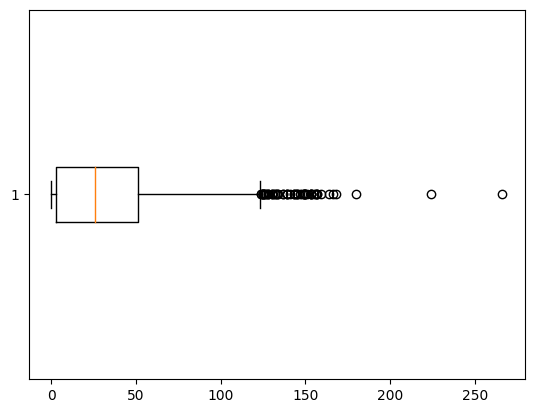

26.0

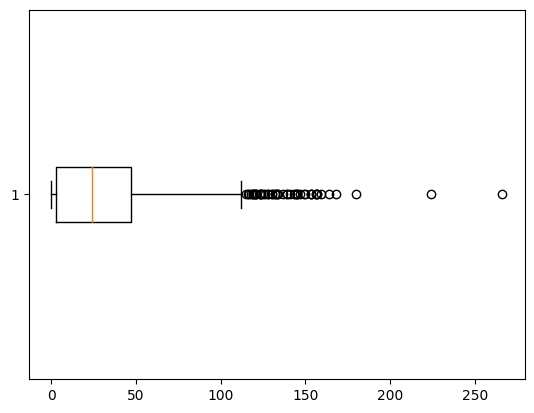

24.0

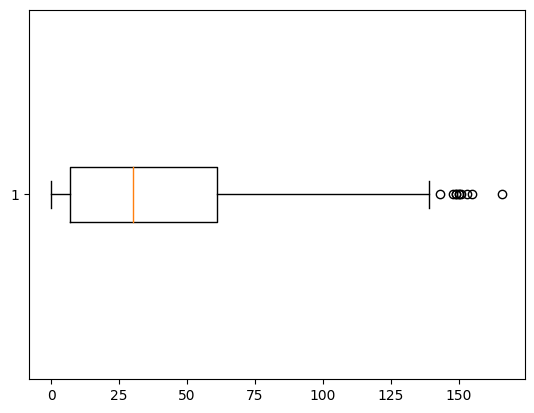

30.0

In [63]:
# Plot a boxplot to visualize the distribution of the monthly texts

plt.boxplot(df_limited['monthly_messages'],vert=False)
plt.show()

median_all_text = np.median(df_limited['monthly_messages'])
display(median_all_text)

plt.boxplot(surf_data['monthly_messages'], vert=False)
plt.show()

median_surf_text = np.median(surf_data['monthly_messages'])
display(median_surf_text)

plt.boxplot(ultimate_data['monthly_messages'], vert=False)
plt.show()

median_ultimate_text = np.median(ultimate_data['monthly_messages'])
display(median_ultimate_text)

**All users**
- Mean: **33.166593981683384**
- Median: **26**

**Surf Users**
- Mean: **31.15956770502225**
- Median: **24**

**Ultimate Users**
- Mean: **37.55138888888889**
- Median: **30**

**All box plots are right-skewed**

- Most users tend to stay under 125 text/ month
- Most surf users tend to stay under 125 texts/ month
- most ultimate users tend to stay under 150 texts/ month

- Based on texts alone going 100 texts over would cost about 3 dollars for a month on the surf plan; this alone does not justify spending an extra 50$/ month for the ultimate plan

**All users**
- Mean: **33.166593981683384**
- Variance: **1160.2644400780625**
- Standard Deviation: **34.062654624648125**
- Median: **26**

**Surf Users**
- Mean: **31.15956770502225**
- Variance: **1126.0082317266622**
- Standard Deviation: **33.556046127734746**
- Median: **24**

**Ultimate Users**
- Mean: **37.55138888888889**
- Variance: **1207.0779147376543**
- Standard Deviation: **34.743026850544474**
- Median: **30**

There are no ultimate users that go over 200 texts. Based off text use alone, if ultimate users who use 150 texts over the limit (150 * 0.03 = 4.5 (surf price)); they would only be spending an extra 4.5 dollars if they were on the surf plan which is not enough to justify using the ultimae plan, but we need to consider how much they use elsewhere to truly determine this. 

### Internet

In [64]:
# Compare the amount of internet traffic consumed by users per plan

#Let's look at a pivot table
avg_gb_pivot = df_limited.pivot_table(index='month', columns= 'plan', values='monthly_gb_used', aggfunc='mean')
display(avg_gb_pivot)

plan,surf,ultimate
month,,
1,17.128571,18.067164
2,17.205742,18.931507
3,16.220994,16.472727
4,15.856557,18.455882
5,17.889706,16.797468
6,16.441379,17.418182
7,16.684685,16.347826
8,16.252174,16.606557
9,16.776119,14.368421


This is where most people may want/need the ultimate plan. If you go over by 2 GB you are paying 20$; so if you tend to go over about 5GB of data you might as well get the ultimate plan

The data above shows, on average, ultimate users use less data in 4 out of the 12 months, but they do not use there data anywhere near the threshold of 30GB

On average, surf users go over their data limit 11 out of 12 months.

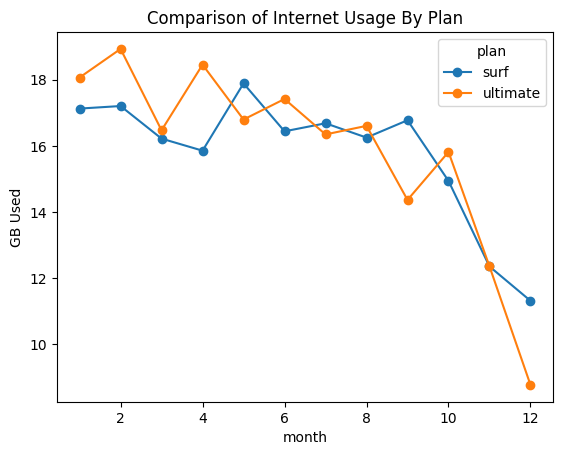

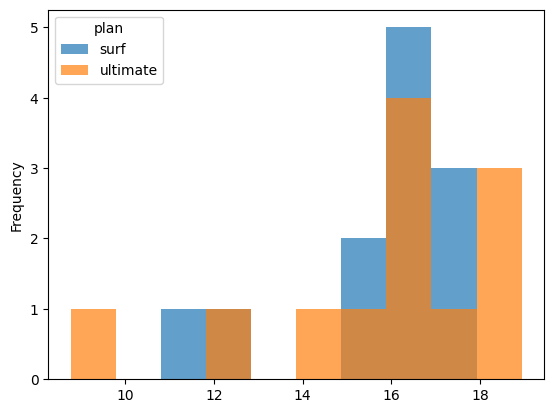

In [65]:
# Compare the amount of internet users of each plan require each month. Plot a histogram.
avg_gb_pivot.plot(title= "Comparison of Internet Usage By Plan", ylabel= "GB Used", style='o-')
plt.show()

avg_gb_pivot.plot(kind='hist', alpha=0.7)
plt.show()

The line plot shows similar usage and similar patterns of usage for average internet use. 

Internet usage slows down toward the end of the year, possibly because people are trying to save money for the holidays or they are busy with family due to the holidays, but this is not confirmed. 

The histogram shows a wider range of GB use for ultimate users than surf users, just as in preious usages. It also shows that both surf and ultimate users most use 17GB although surf users have a larger peak. 

In [66]:
# Calculate the mean and the variance of the monthly internet

mean_gb = df_limited['monthly_gb_used'].mean()
display(mean_gb)
var_gb = np.var(df_limited['monthly_gb_used'])
display(var_gb)
std_gb = np.std(df_limited['monthly_gb_used'])
display(std_gb)

mean_gb_surf = surf_data['monthly_gb_used'].mean()
display(mean_gb_surf)
var_gb_surf = np.var(surf_data['monthly_gb_used'])
display(var_gb_surf)
std_gb_surf = np.std(surf_data['monthly_gb_used'])
display(std_gb_surf)

mean_gb_ultimate = ultimate_data['monthly_gb_used'].mean()
display(mean_gb_ultimate)
var_gb_ultimate = np.var(ultimate_data['monthly_gb_used'])
display(var_gb_ultimate)
std_gb_ultimate = np.std(ultimate_data['monthly_gb_used'])
display(std_gb_ultimate)

16.585695595290012

58.63951627367009

7.657644303156819

16.387158296249204

59.310375459366966

7.701322968124825

17.019444444444446

56.89962191358025

7.543183804838661

**All Users**
- Mean: **16.585695595290012**
- Variance: **58.63951627367009**
- Standard Deviation: **7.657644303156819**

**Surf Users**
- Mean: **16.387158296249204**
- Variance: **59.310375459366966**
- Standard Deviation: **7.701322968124825**

**Ultimate Users**
- Mean: **17.019444444444446**
- Variance: **56.89962191358025**
- Standard Deviation: **7.543183804838661**

So, on average Surf users use less data. The standard deviation is about 7 or 8 in all cases. Based on this data alone more than 50% of surf users go over their data limit.

Based on this data, Ultimate users hardly go over their limit. At least 84% stay under their limit. 

Internet usage may be a prime reason that a customer would prefer the ultimate plan. 

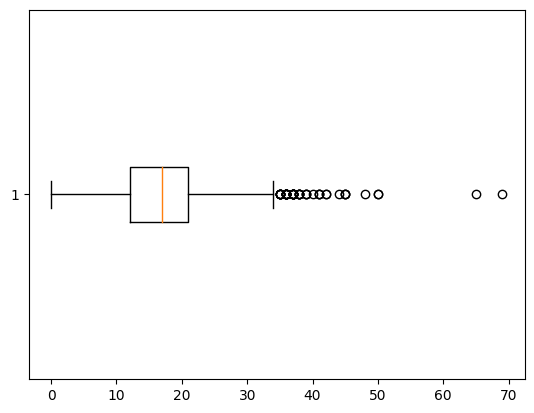

17.0

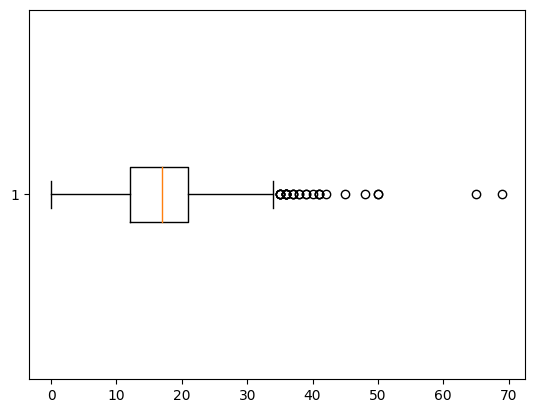

17.0

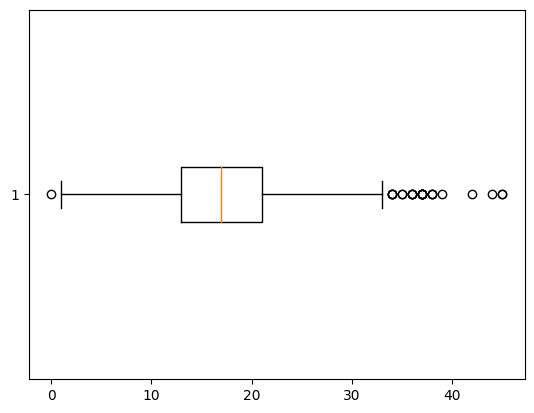

17.0

In [67]:
# Plot a boxplot to visualize the distribution of the monthly internet use
plt.boxplot(df_limited['monthly_gb_used'],vert=False)
plt.show()

median_gb = np.median(df_limited['monthly_gb_used'])
display(median_gb)

plt.boxplot(surf_data['monthly_gb_used'],vert=False)
plt.show()

median_gb_surf = np.median(surf_data['monthly_gb_used'])
display(median_gb_surf)

plt.boxplot(ultimate_data['monthly_gb_used'],vert=False)
plt.show()

median_gb_ultimate = np.median(ultimate_data['monthly_gb_used'])
display(median_gb_ultimate)

**All Users**
- Mean: **16.585695595290012**
- Median: **17**

**Surf Users**
- Mean: **16.387158296249204**
- Median: **17**

**Ultimate Users**
- Mean: **17.019444444444446**
- Median: **17**

**All boxplots are pretty evenly skewed**
However, surf users are slightly left skewed and ultimate users are symmetric

Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?

**All Users**
- Mean: **16.585695595290012**
- Variance: **58.63951627367009**
- Standard Deviation: **7.657644303156819**
- Mean: **17**

**Surf Users**
- Mean: **16.387158296249204**
- Variance: **59.310375459366966**
- Standard Deviation: **7.701322968124825**
- Mean: **17**

**Ultimate Users**
- Mean: **17.019444444444446**
- Variance: **56.89962191358025**
- Standard Deviation: **7.543183804838661**
- Mean: **17**

Ultimate Users hardly go over their limit as opposed to Surf users. If surf users are using 20GB or more of data then they should switch to the Ultimate Plan. 

This data shows that about 50% of surf users would benefit from switching to the ultimate plan and shows that roughly 50% of users on the ultimate plan would benefit from switching to the surf plan (based solely on this data).

If ultimate users only use 19GB of data then they would save only 10 dollars from switching to surf, but if they continuously using 19GB or less per month, then they may want to switch.  

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.] Remove bracketed comments before submitting project.

In [68]:
# Compare the amount of total revenue consumed by users per plan

#Create a pivot table
avg_revenue_pivot = df_limited.pivot_table(index='month', columns='plan', values='monthly_revenue', aggfunc='mean')
display(avg_revenue_pivot)


plan,surf,ultimate
month,,
1,60.898381,72.037313
2,63.309856,77.287671
3,62.072652,70.000000
4,52.810943,73.191176
5,63.382941,70.620253
6,54.514138,72.481818
7,63.546847,70.456522
8,60.207565,72.065574
9,59.804776,70.000000


This is where we can really start to see who should and should not be on a plan. 

This data should show nothing under 20 dollars for surf users and nothing under 70 dollars for ultimate users b/c that is their monthly base payment.

From this pivot table we can see that, on average, surf users are spending less than ultimate users. By this point, this result is not so surprising. From the previous pivot tables it was clear that calls and messages would not have a huge impact on users, but internet usage was the main concern. 

Let's continue to compare monthly revenue to get a full picture.

<AxesSubplot:ylabel='Frequency'>

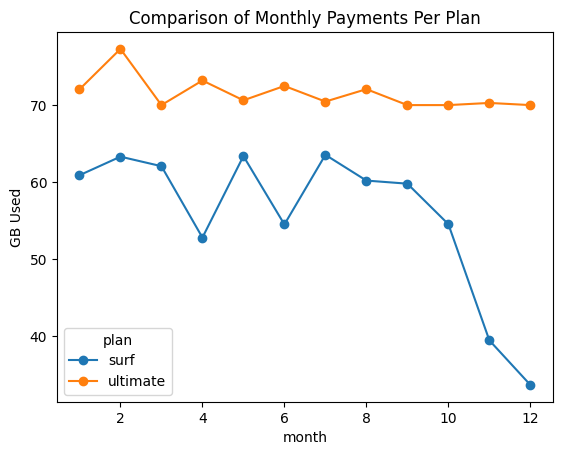

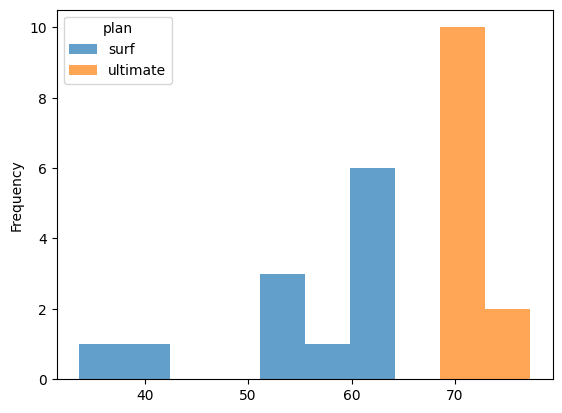

In [69]:
# Compare the amount of total revenue users of each plan require each month. Plot a histogram.

avg_revenue_pivot.plot(title="Comparison of Monthly Payments Per Plan", style='o-',ylabel="GB Used")

avg_revenue_pivot.plot(kind='hist', alpha=0.7)

It's clear from this data that ultimate users are paying more per month, on average. 

In [70]:
# Calculate the mean and the variance of the monthly total_revenue

mean_revenue = df_limited['monthly_revenue'].mean()
display(mean_revenue)
var_revenue = np.var(df_limited['monthly_revenue'])
display(var_revenue)
std_revenue = np.std(df_limited['monthly_revenue'])
display(std_revenue)

mean_surf_revenue = surf_data['monthly_revenue'].mean()
display(mean_surf_revenue)
var_surf_revenue = np.var(surf_data['monthly_revenue'])
display(var_surf_revenue)
std_surf_revenue = np.std(surf_data['monthly_revenue'])
display(std_surf_revenue)

mean_ultimate_revenue = ultimate_data['monthly_revenue'].mean()
display(mean_ultimate_revenue)
var_ultimate_revenue = np.var(ultimate_data['monthly_revenue'])
display(var_ultimate_revenue)
std_ultimate_revenue = np.std(ultimate_data['monthly_revenue'])
display(std_ultimate_revenue)

62.73405146096816

2048.3629940086907

45.25884437332322

58.455931341385885

2875.8133128802197

53.626610119232964

72.08055555555555

113.2712885802469

10.642898504648388

**All Users**
- Mean: **62.73405146096816**
- Variance: **2048.3629940086907**
- Standard Deviation: **45.25884437332322**

**Surf Users**
- Mean: **58.455931341385885**
- Variance: **2875.8133128802197**
- Standard Deviation: **53.626610119232964**

**Ultimate Users**
- Mean: **72.08055555555555**
- Variance: **113.2712885802469**
- Standard Deviation: **10.642898504648388**

This gives us a much clearer idea of the data:
- Surf users have a large dispersion
- Almost all Ultimate users are paying less than 113 dollars a month while roughly 16% of surf users are paying more than 113 dollars (this is a rough estimate based on the standard deviation and has not been fully calculated)

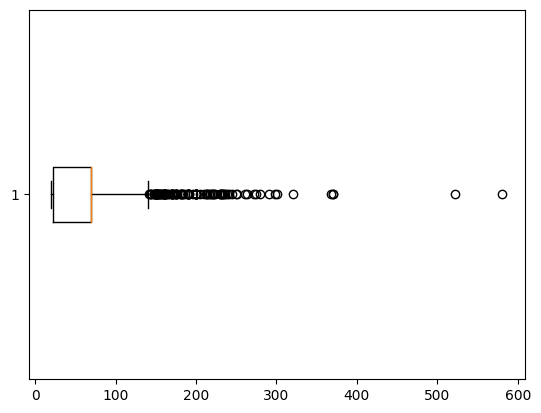

70.0

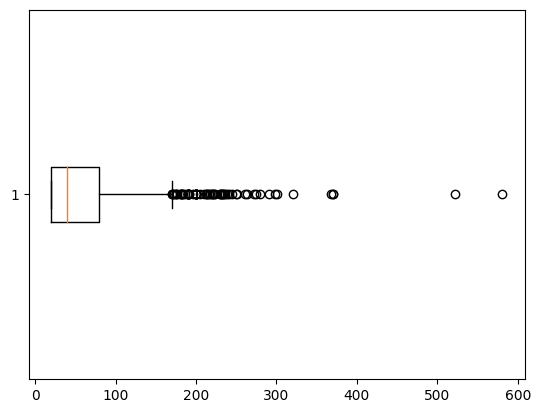

40.0

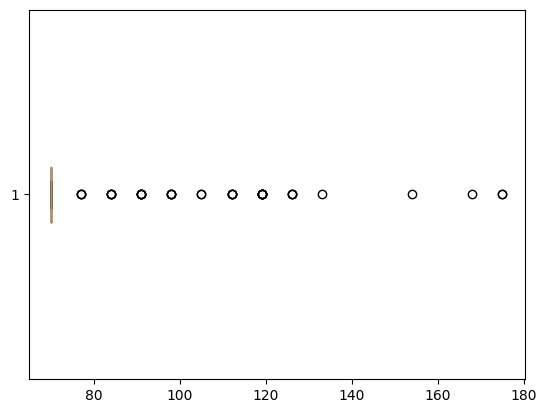

70.0

In [71]:
# Plot a boxplot to visualize the distribution of the monthly total revenue

plt.boxplot(df_limited['monthly_revenue'], vert = False)
plt.show()

median_revenue = np.median(df_limited['monthly_revenue'])
display(median_revenue)

plt.boxplot(surf_data['monthly_revenue'], vert=False)
plt.show()

median_surf_revenue = np.median(surf_data['monthly_revenue'])
display(median_surf_revenue)

plt.boxplot(ultimate_data['monthly_revenue'], vert = False)
plt.show()

median_ultimate_revenue = np.median(ultimate_data['monthly_revenue'])
display(median_ultimate_revenue)

**All Users**
- Mean: **62.73405146096816**
- Median: **70**

**Surf Users**
- Mean: **58.455931341385885**
- Median: **40**

**Ultimate Users**
- Mean: **72.08055555555555**
- Median: **70**

**Ultimate Users and Surf users data for monthly revenue is right skewed**

This is very telling:
- Like predicted there are only about 7 ultimate users that go over roughly 113 dollars
- You'll also notice the range for the boxplots differs by a lot;
    - surf: ~ 20 - 600
    - ultimate: ~ 70 - 180

This tells us that the ultimate plan is far superior. There may be a chance that you pay less with the surf plan; however, ultimate users do not tend to extend their limit as much as surf users especially when it comes to internet usage which is the most expensive limit.

If you think about it, in terms of data usage, you are getting 15 more GB with the Ultimate plan and 15 extra GB on the surf plan would cost 150 extra dollar plus the base payment of 20 dollar (170 total). This is 90 dollars more than getting the ultimate plan at 70 dollars that comes with the extra GB


**All Users**
- Mean: **62.73405146096816**
- Variance: **2048.3629940086907**
- Standard Deviation: **45.25884437332322**
- Median: **70**

**Surf Users**
- Mean: **58.455931341385885**
- Variance: **2875.8133128802197**
- Standard Deviation: **53.626610119232964**
- Median: **40**

**Ultimate Users**
- Mean: **72.08055555555555**
- Variance: **113.2712885802469**
- Standard Deviation: **10.642898504648388**
- Median: **70**

With this range in data, I would conclude that the ultimate plan gives users more leeway when accruing extra costs. This data and previous data shows that internet usage is the main reason users are exceeding their limits on the surf plan. Overall, it would be a much safer choice to choose the Ultimate plan. I would advise users to choose the ultimate plan if they are going to use their plan for internet usage, but if users will only use their plan for texts and calls then it's safe to choose the surf plan as the exceeding limits costs are insignificant.

With close to 100% of users on the ultimate plan paying under 105 dollars and under and almost 100% of users on the surf plan paying close to 220 dollars and under; the ultimate plan is safer to choose. (considering internet usage)

If users are not able to afford 70 dollars per month, I would advise that they call their provideer to check their usages. 

**However, the quesiton asks is "which prepaid plan brings in more revenue"; so, compare the total revenue between plans:**

plan,surf,ultimate
month,,
1,12788.66,9653.0
2,13231.76,5642.0
3,11235.15,3850.0
4,12885.87,4977.0
5,8620.08,5579.0
6,7904.55,7973.0
7,7053.70,3241.0
8,6923.87,4396.0
9,4006.92,2660.0


<AxesSubplot:xlabel='month'>

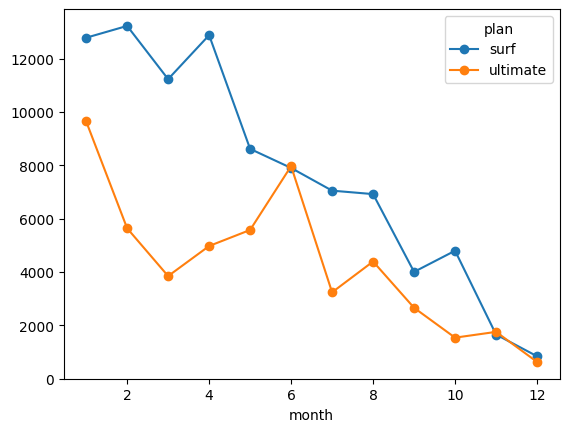

In [72]:
#Sum the total montly revenue
sum_revenue_pivot = df_limited.pivot_table(index='month', columns='plan', values='monthly_revenue', aggfunc='sum')
display(sum_revenue_pivot)

#Create a line plot with the monthly revenue
sum_revenue_pivot.plot(style='o-')

Overall, the surf plan brings in more total revenue.
- Keep in mind there are about double the surf users than ultimate users
- Not enough surf users exceed their plan for a revenue advantage
- If there were a similar number of ultimate users the ultimate plan would make more revenue
- It seems that if there were more ultimate users then the ultimate plan would make more revenue
- Potential fixes to this issue is to incentivise new users to choose the ultimate plan
- The company could wave the monthly fee for the first month if they sign up for the ultimate plan
- The company could raise the monthly cost for surf users
- The company could advertise unlimited call and text messaging since no user has gotten close to exceeding 1000 texts.
- There are several incentives the company could use to their advantage that wouldn't cost them or hardly cost them.

A more expensive plan needs to be more attractive than a less expensive plan which here is true, but when customers are primarily looking at the monthly cost they see a quick difference of 240 dollars a year vs. 840 dollars a year. For this you need to understand human behavior. Since we rarely see limits exceeding enough in text or call usage for it to make a difference to a surf user, the company may want to raise the cost limit for surf users. 
- Call usage is almost identical with almost all users on both plans rarely exceeding over 1100 minutes which is 33 extra dollars for surf users
- For text usage almost 100% of all users do not exceed 200 texts which is only 6 dollars for surf users
- For internet usage almost 100% of all users use 35GB or less of data which is 200 dollars for surf users

**Compare to Surf Limit:**
- 60% of users do not exceed 500 minutes
    - 60% surf users do not exceed 500 minutes
    - 60% ultimate users do not exceed 500 minutes
- 67% of users do not exceed 50 messages
    - 80% surf users do not exceed 50 messages
    - 62% ultimate users do not exceed 50 messages
- 43% of users do not exceed 15GB of data
    - 44% of surf users do not exceed 15GB of data
    - 41% of ultimate users do not exceed 15GB of data
- 37% of users pay 20 dollars a month for service
    - 26% of surf users pay 20 dollars a month for service
    - 0% of ultimate users pay 20 dollars a month for service
- 45% pay 70 dollars or less a month for service
    - 43% of surf users pay 70 dollars or less a month for service
    - 57% of ultimate users pay 70 a month for service
- 99.7% of users only use 1,138.09 minutes
    - 99.7% of surf users only use 1131.89 minutes
    - 99.7% of ultimate users only use 1,151.47 minutes
- 99.7% of users use 135 texts or less
    - 99.7% of surf users use 131.84 texts or less
    - 99.7% of ultimate users use 141.77 texts or less
- 93.85% use 30 GB of data or less
    - 93.85% of surf users use 30GB of data or less
    - 93.85% of ultimate users use 30GB of data or less

We can see that internet usage will be most costly for surf users; let's see data for usage of 20GB or less
- 35% of users use 20GB of data or less (65% use more)
    - 34% of surf users use 20GB of data or less (66% use more)
    - 37% of ultimate users use 20GB of data or less (63% use more)

All of this data to show that adjustments could be made to increase revenue. We can see with just the surf users using more than 20GB of data is helping to increase revenue. There are about 66% of surf users using more than 20GB of data which increases their bill to over 70$. However, when the data is put together for total revenue we can see that on average, surf users are spending less a month on their plan. 

The company should keep the data usages the same as it looks like there is plenty of usage for surf users, but if the company wants to increase revenue they may consider incentives to join the ultimate plan or adjust pricing for the surf plan. 


  

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job! Your plots are correct and excellent conclusions!

## Test statistical hypotheses

Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value. 

H0 = There is no difference for the average revenue from users of the Ultimate and Surf calling plans. 

H1 = The average revenue from users of the Ultimate and Surf calling plans differ

**Use the Hypothesis on the Equality of Two Populations Means T-test**

Reason: We are comparing the average monthly revenue between surf users and ultimate plan users; we are comparing customers from 2 different plans

In [73]:
# Test the hypotheses
display(df_limited)

display(mean_surf_revenue)
display(mean_ultimate_revenue)

display(np.var(surf_data['monthly_revenue']))
display(np.var(ultimate_data['monthly_revenue']))

surf_monthly_rev = surf_data['monthly_revenue']
ultimate_monthly_rev = ultimate_data['monthly_revenue']

#Critical Significance set to 1%
alpha = 0.01

#If the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(surf_monthly_rev, ultimate_monthly_rev,equal_var = False)

#p-value: The probability of getting a difference; therefore low number = significant difference
#Think of standard deviation, if the p-value falls on the outside (the lower 5-10%) there's high significance of difference or small chance of no significance
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

,user_id,month,monthly_min_of_call,monthly_messages,gb_used,monthly_gb_used,plan,total_usage_call,total_usage_message,total_usage_gb,monthly_revenue
0,1000,12,124.0,11.0,1.824827,2.0,ultimate,0.0,0.0,0.0,70.0
1,1006,11,10.0,15.0,1.985000,2.0,ultimate,0.0,0.0,0.0,70.0
2,1006,11,59.0,139.0,30.824203,31.0,ultimate,0.0,0.0,7.0,77.0
3,1008,8,476.0,21.0,16.417457,17.0,ultimate,0.0,0.0,0.0,70.0
4,1008,8,446.0,37.0,22.722380,23.0,ultimate,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2,339.0,0.0,22.205077,23.0,surf,0.0,0.0,80.0,100.0
2289,1499,5,346.0,0.0,12.461382,13.0,surf,0.0,0.0,0.0,20.0
2290,1499,5,385.0,0.0,18.706747,19.0,surf,0.0,0.0,40.0,60.0
2291,1499,5,308.0,0.0,16.136113,17.0,surf,0.0,0.0,20.0,40.0


58.455931341385885

72.08055555555555

2875.8133128802197

113.2712885802469

p-value: 1.3745258979284901e-21
We reject the null hypothesis


**p-value:** 1.3745258979284901e-21

**We reject the null hypothesis** 
- There is a significant difference between users of each plan.
- There's an extremely small chance of getting no difference for the average revenue from users of the Ultimate and Surf calling plans.

**Conclusion:** There is a significant difference for the average revenue from users of the Ultimate and Surf calling plans. 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job! Everything correct!

**Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.**

Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.

H0 = Average revenue from users in the NY-NJ area is **NOT** different from users in other regions

H1 = The average revenue from users in NY-NJ area is different from users in other regions

In [74]:
# Test the hypotheses

#How many users are from NY-NJ (80)
ny_nj = users[users['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
display(ny_nj)

#Let's drop everything except user_id and city from users dataset
users_limited_2 = users.drop(columns=['first_name', 'last_name', 'age', 'reg_date', 'plan', 'churn_date', 'in_service', 'month'])
display(users_limited_2)

#Let's drop more columns in df_limited, we don't need them
df_limited_2 = df_limited.drop(columns=['gb_used', 'total_usage_message','total_usage_gb','total_usage_call'])
display(df_limited_2)

# Merge the datasets
merge_city_info = df_limited_2.merge(users_limited_2, on='user_id')
display(merge_city_info)

#Extract NY-NJ information
ny_nj_only = merge_city_info[merge_city_info['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
display(ny_nj_only)

#Extract all other regions
other_regions = merge_city_info[merge_city_info['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']
display(other_regions)

ny_nj_mean = ny_nj_only['monthly_revenue'].mean()
display(f"Mean of NY-NJ users: {ny_nj_mean}")

other_regions_mean = other_regions['monthly_revenue'].mean()
display(f"Mean of other regions users: {other_regions_mean}")

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,in_service,month
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,True,11
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,4
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaT,True,8
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaT,True,6
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT,True,7
...,...,...,...,...,...,...,...,...,...,...
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaT,True,6
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaT,True,1
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaT,True,4
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,True,9


,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,"New Orleans-Metairie, LA MSA"
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA"


,user_id,month,monthly_min_of_call,monthly_messages,monthly_gb_used,plan,monthly_revenue
0,1000,12,124.0,11.0,2.0,ultimate,70.0
1,1006,11,10.0,15.0,2.0,ultimate,70.0
2,1006,11,59.0,139.0,31.0,ultimate,77.0
3,1008,8,476.0,21.0,17.0,ultimate,70.0
4,1008,8,446.0,37.0,23.0,ultimate,70.0
...,...,...,...,...,...,...,...
2288,1498,2,339.0,0.0,23.0,surf,100.0
2289,1499,5,346.0,0.0,13.0,surf,20.0
2290,1499,5,385.0,0.0,19.0,surf,60.0
2291,1499,5,308.0,0.0,17.0,surf,40.0


,user_id,month,monthly_min_of_call,monthly_messages,monthly_gb_used,plan,monthly_revenue,city
0,1000,12,124.0,11.0,2.0,ultimate,70.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1006,11,10.0,15.0,2.0,ultimate,70.0,"San Francisco-Oakland-Berkeley, CA MSA"
2,1006,11,59.0,139.0,31.0,ultimate,77.0,"San Francisco-Oakland-Berkeley, CA MSA"
3,1008,8,476.0,21.0,17.0,ultimate,70.0,"Orlando-Kissimmee-Sanford, FL MSA"
4,1008,8,446.0,37.0,23.0,ultimate,70.0,"Orlando-Kissimmee-Sanford, FL MSA"
...,...,...,...,...,...,...,...,...
2288,1498,2,339.0,0.0,23.0,surf,100.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2289,1499,5,346.0,0.0,13.0,surf,20.0,"Orlando-Kissimmee-Sanford, FL MSA"
2290,1499,5,385.0,0.0,19.0,surf,60.0,"Orlando-Kissimmee-Sanford, FL MSA"
2291,1499,5,308.0,0.0,17.0,surf,40.0,"Orlando-Kissimmee-Sanford, FL MSA"


,user_id,month,monthly_min_of_call,monthly_messages,monthly_gb_used,plan,monthly_revenue,city
30,1031,7,304.0,1.0,11.0,ultimate,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
31,1031,7,483.0,2.0,21.0,ultimate,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
32,1031,7,515.0,3.0,13.0,ultimate,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
33,1031,7,563.0,2.0,19.0,ultimate,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
34,1031,7,611.0,1.0,16.0,ultimate,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
...,...,...,...,...,...,...,...,...
2284,1498,2,266.0,0.0,20.0,surf,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2285,1498,2,363.0,0.0,22.0,surf,90.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2286,1498,2,298.0,0.0,20.0,surf,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2287,1498,2,223.0,0.0,19.0,surf,60.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"


,user_id,month,monthly_min_of_call,monthly_messages,monthly_gb_used,plan,monthly_revenue,city
0,1000,12,124.0,11.0,2.0,ultimate,70.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1006,11,10.0,15.0,2.0,ultimate,70.0,"San Francisco-Oakland-Berkeley, CA MSA"
2,1006,11,59.0,139.0,31.0,ultimate,77.0,"San Francisco-Oakland-Berkeley, CA MSA"
3,1008,8,476.0,21.0,17.0,ultimate,70.0,"Orlando-Kissimmee-Sanford, FL MSA"
4,1008,8,446.0,37.0,23.0,ultimate,70.0,"Orlando-Kissimmee-Sanford, FL MSA"
...,...,...,...,...,...,...,...,...
2277,1496,2,294.0,11.0,16.0,surf,30.0,"New Orleans-Metairie, LA MSA"
2289,1499,5,346.0,0.0,13.0,surf,20.0,"Orlando-Kissimmee-Sanford, FL MSA"
2290,1499,5,385.0,0.0,19.0,surf,60.0,"Orlando-Kissimmee-Sanford, FL MSA"
2291,1499,5,308.0,0.0,17.0,surf,40.0,"Orlando-Kissimmee-Sanford, FL MSA"


'Mean of NY-NJ users: 58.31923076923078'

'Mean of other regions users: 63.602729645093945'

In [75]:
#Test your hypothesis

ny_nj_only_rev = ny_nj_only['monthly_revenue']
other_regions_rev = other_regions['monthly_revenue']
display(ny_nj_only_rev)
display(other_regions_rev)


#Determine if var_equal is True (if 2-4x bigger, not True)
display(np.var(ny_nj_only_rev))
display(np.var(other_regions_rev))


alpha = 0.05

results = st.ttest_ind(ny_nj_only_rev,other_regions_rev)

pvalue = results.pvalue
print('p-value:', pvalue)

if pvalue < alpha:
    print ("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

30       70.0
31       70.0
32       70.0
33       70.0
34       70.0
        ...  
2284     70.0
2285     90.0
2286     70.0
2287     60.0
2288    100.0
Name: monthly_revenue, Length: 377, dtype: float64

0       70.0
1       70.0
2       77.0
3       70.0
4       70.0
        ... 
2277    30.0
2289    20.0
2290    60.0
2291    40.0
2292    90.0
Name: monthly_revenue, Length: 1916, dtype: float64

1767.8803498061618

2098.9622465678267

p-value: 0.03828262811963659
We reject the null hypothesis


**p-value:** 0.03828262811963659

**We reject the null hypothesis** 
- There is a significant difference NY-NJ users and users of other regions
- There's a low chance of getting no difference for the average revenue for NY-NJ users and user of other regions.

**Conclusion:** There is a significant difference for users in NY-NJ regions compared to other regions. 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job!

## General conclusion

List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.

Overall, 

- Out of all 3 additional usages, internet makes the most revenue. Around 40%, adding around $38,000 for the year. Scroll to the bottom for the breakdown of this number.

- Out of the 3 additional usages, minute usage was the 2nd contributing factor for additional revenue. However, this additional revenue is still very small at 2%, adding around $2,900 to the total revenue for the year. Scroll to the bottom for this breakdown.

- Out of all 3 additional usages, texts make the least in additional revenue. However, this additional revenue is not substantial and if you scroll to the bottom of the page I have a breakdown of where each additional usage goes. For texts, the total additional revenue is less than 1% for the year contributing about $330.
- There are no ultimate users that go over 200 texts. Based off text use alone, if ultimate users who use 150 texts over the limit (150 * 0.03 = 4.5 (surf price)); they would only be spending an extra 4.5 dollars if they were on the surf plan which is not enough to justify using the ultimae plan. 

- The highest contributing factor of revenue is the base pay of the plan at around 57% and $81,860 while additional charges make up around 43% at around 61989 dollars for the year. The reason the additional charges have a high percentage is due to internet usage, but this information tells the company that they want to promote the ultimate plan.

- All of this data shows that adjustments could be made to increase revenue. When surf users use more than 20GB of data it helps to increase revenue. There are about 66% of surf users using more than 20GB of data which increases their bill to over 70$. However, when the data is put together for total revenue we can see that on average, surf users are spending less a month on their plan. The company should keep the data usages the same as it looks like there is plenty of usage for surf users, but if the company wants to increase revenue they may consider incentives to join the ultimate plan or adjust pricing for the surf plan limits.


- There is a very strong significant difference for the average revenue from users of the Ultimate and Surf calling plans. This supprts previous data. 

- There is a significant difference for users in NY-NJ regions compared to other regions. We would need to do more research to understand what this difference is. 

**Breakdown of Categories**
- Internet: ~40.85%
- Call: ~2.02
- Text: ~0.23
- Monthly: ~56.91
- **Total:** ~100%
- Monthly: ~56.91%
- Extra: ~43.09%
- **Total:** 100%

For further breakdown of the project, continue reading. Otherwise, scroll to the bottom of the page to look at the breakdowns of the categories. 

### `plans` dataset: 

- Added a `gb_per_month_included` column since the project is measuring internet usage in GB not MB
- Changed the order of the columns for readability using **`.insert()`** and **`.pop()`**
- Used to integrate into a working DataFrame

In [76]:
display(plans)

,plan_name,usd_monthly_pay,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15360,15.0,500,0.03,10,0.03
1,ultimate,70,1000,30720,30.0,3000,0.01,7,0.01


### `internet` dataset

- Added a month column
- converted MB used to GB used, separated the data for monthly usage, rounded the monthly usage up for each user, and made it into a column
- sessions increased numerically and chronologically with each month (not usage):
    - 1: 96
    - 2: 604
    - 3: 1336
    - 4: 2558
    - 5: 4288
    - 6: 6057
    - 7: 8110
    - 8: 10718
    - 9: 12722
    - 10: 16193
    - 11: 18651
    - 12: 23492
- There are 489 users who use their internet
- Added a GB used per month rounded up column



**Statistical behavior for internet usage**

|plan|	surf   |  ultimate  |
|:--:|:-------:|:----------:|
|month|                    
|'''''|
|1	 |17.128571	|18.067164
|2	 |17.205742	|18.931507
|3	 |16.220994	|16.472727
|4	 |15.856557	|18.455882
|5	 |17.889706	|16.797468
|6	 |16.441379	|17.418182
|7	 |16.684685	|16.347826
|8	 |16.252174	|16.606557
|9	 |16.776119	|14.368421
|10	 |14.943182	|15.818182
|11	 |12.357143	|12.360000
|12	 |11.320000	|8.777778           

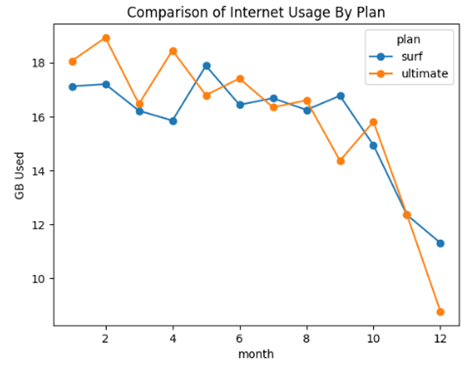 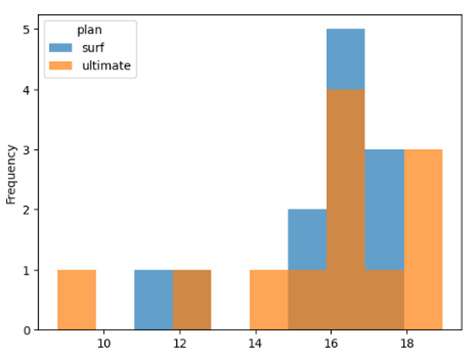

**All Users**
- **Mean:** 16.585695595290012
- **Variance:** 58.63951627367009
- **Standard Deviation:** 7.657644303156819
- **Median:** 17

**Surf Users**
- **Mean:** 16.387158296249204
- **Variance:** 59.310375459366966
- **Standard Deviation:** 7.701322968124825
- **Median:** 17

**Ultimate Users**
- **Mean:** 17.019444444444446
- **Variance:** 56.89962191358025
- **Standard Deviation:** 7.543183804838661
- **Median:** 17

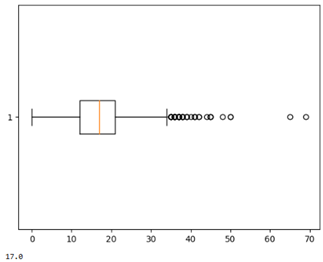 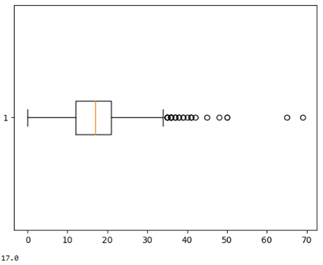  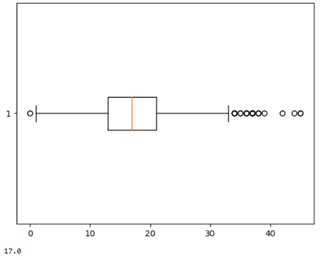

- Surf is left-skewed; ultimate is right-skewed
- Ultimate Users hardly go over their limit as opposed to Surf users. If surf users are using 20GB or more of data then they should switch to the Ultimate Plan.
- This data shows that about 50% of surf users would benefit from switching to the ultimate plan and shows that roughly 7% of users on the ultimate plan would benefit from switching to the surf plan (based solely on this data).
- If ultimate users only use 19GB of data then they would save only 10 dollars from switching to surf, but if they continuously use 19GB or less per month, then they may want to switch.

**Final Thoughts**

Out of all 3 additional usages, internet makes the most revenue. Around 40%, adding around $38,000 for the year. Scroll to the bottoms for the breakdown of this number.


### `messages` dataset

- `message_date` changed to DateTime data type
- There are 402 users who used their text messaging services
- Added a `month` column with the dt.accessor
- Got the number of messages used per month per user

**Statistical behavior for message data**

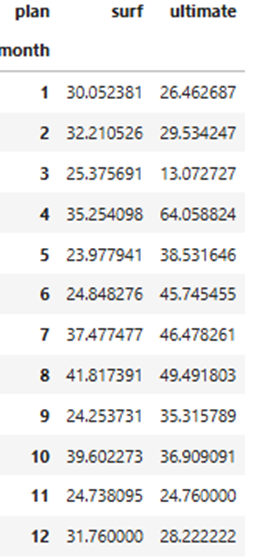  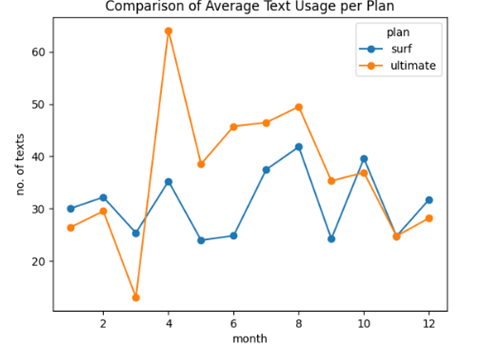  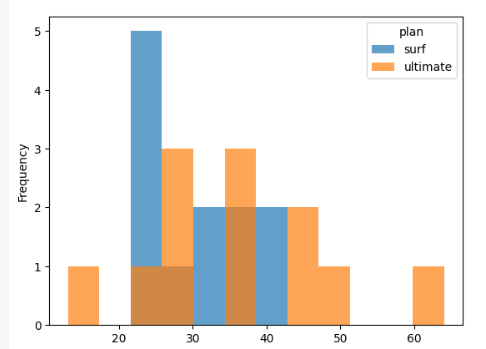
- Ultimate users used less texts on month 1,2,3,,10,12 (on average): 5/12 months
- Ultimate users (on average) rarely surpass the monthly limit set for surf users except for month 4
- Comparing this average data to the call duration average data, so far, it seems the ultimate plan is not worth 50 extra dollars a month for the extra limits

- The line plot shows a similar pattern of text usage, but much higher usage when higher and not too different when lower when compared to surf users
- On average Ultimate users rarely cap the limit set for surf users
- Why was there a sharp increase in month 4, did the company have a deal for ultimate users during this time; possibly an incentive for surf users to switch the the ultimate package?
- The histogram skews right
- The histogram tells us that ultimate users tend to send more text messages on average
- The average range for surf users is ~ 23 - 41
- surf users more frequently sent around 25 texts
- The average range for ultimate users is ~13 - 65
- ultimate users more frequently sent around 25-30 and 35-40 texts on average

**All Users**
- **Mean:** 33.166593981683384
- **Variance:** 1160.2644400780625
- **Standard Deviation:** 34.062654624648125
- **Median:** 26

**Surf Users**
- **Mean:** 31.15956770502225
- **Variance:** 1126.0082317266622
- **Standard Deviation:** 33.556046127734746
- **Median:** 24

**Ultimate Users**
- **Mean:** 37.55138888888889
- **Variance:** 1207.0779147376543
- **Standard Deviation:** 34.743026850544474
- **Median:** 30

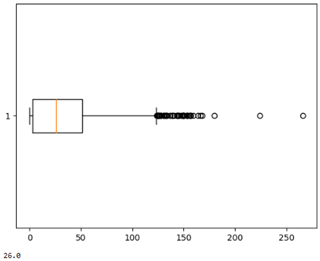  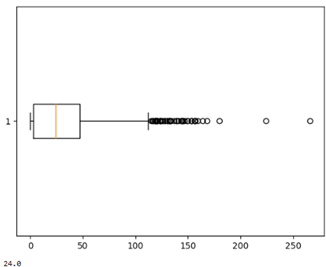  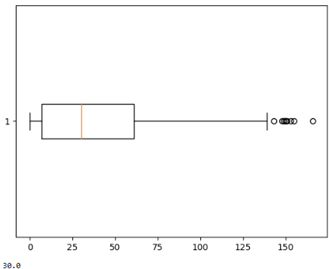
- All box plots are right-skewed
- Most users tend to stay under 125 text/ month
- Most surf users tend to stay under 125 texts/ month
- most ultimate users tend to stay under 150 texts/ month
- Based on texts alone going 100 texts over would cost about 3 dollars for a month on the surf plan; this alone does not justify spending an extra 50$/ month for the ultimate plan


**Final Thoughts**

There are no ultimate users that go over 200 texts. Based off text use alone, if ultimate users who use 150 texts over the limit (150 * 0.03 = 4.5 (surf price)); they would only be spending an extra 4.5 dollars if they were on the surf plan which is not enough to justify using the ultimae plan, but we need to consider how much they use elsewhere to truly determine this.

Out of all 3 additional usages, texts make the least in additional revenue. However, this additional revenue is not substantial and if you scroll to the bottom of the page I have a breakdown of where each additional usage goes. For texts, the total additional revenue is less than 1% for the year contributing about $330. 


### `calls` dataset

- rounded up the duration of the users calls to the whole number for each individual call and added a column with this information
- put `call_date` in DateTime data type
- Added a month column with the dt.accessor
- Got monthly calls per user
- Got monthly minutes per user (used the rounded up minutes since each phone call needed to be rounded up per project guidelines)

**Statistical behavior for Calls**

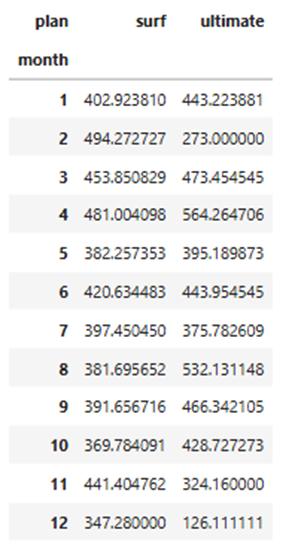  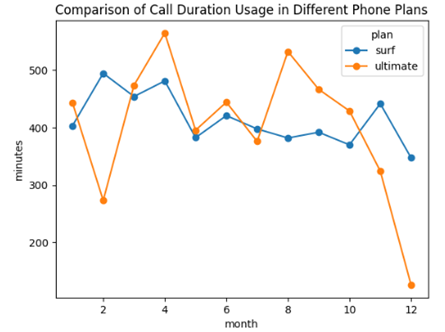  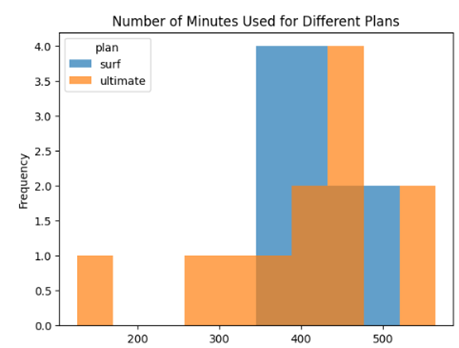
- Both graphs show more consistency with surf users minute usage
- Surf range: ~350-525
- Ultimate range: ~125-550
- Both seem to drop throughout the end of the year although ultimate is a more substantial drop

**All Users**
- **Mean:** 429.2834714348016
- **Variance:** 55822.82326365782
- **Standard Deviation:** 236.2685405712276
- **Median:** 425

**Surf Users**
- **Mean:** 428.7495232040687
- **Variance:** 54933.334591317485
- **Standard Deviation:** 234.37861376695076
- **Median:** 425

**Ultimate Users**
- **Mean:** 430.45
- **Variance:** 57764.12527777777
- **Standard Deviation:** 240.34168443650753
- **Median:** 424

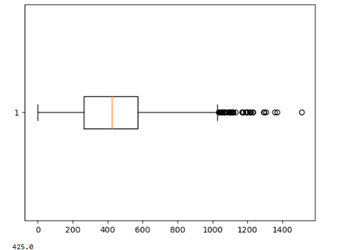  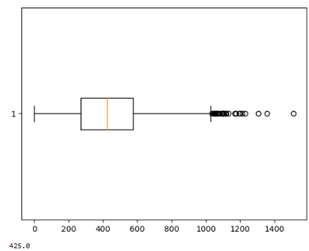  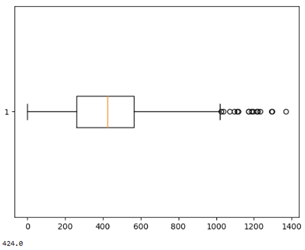
- Interesting the medians are all very similar or the same

When comparing the data month to month:
- surf users were more consistent in usage for duration of their calls
- ultimate users were more eratic in usage for duration of their calls

- A possible reason that ultimate users are more erratic is that they do not have to worry about their usage; therefore, they do not need to get on or off the phone to "waste minutes".
- Another reason, we have not looked at the way age effects this data; maybe surf users are older and tend to favor calling which is why it may be more consistent. We would also need to compare the data to other usages like text and internet.


**Final Thoughts**

The highest number of minutes used for the ultimate plan was about 1400. This would be about 1100 minutes over. Let's see how much this would be for a surf user (1100 * 0.03 = 33). 33 dollars is pretty high by itself so if this ultimate user ONLY went over on calls and nowhere else then they could switch to the surf plan and pay less.

Out of the 3 additional usages, minute usage was the 2nd contributing factor for additional revenue. However, this additional revenue is still very small at 2%, adding around $2,900 to the total revenue for the year. Scroll to the bottom for this breakdown.

### `users` dataset

- changed the dtype for `reg_date` and `churn_date`
- Used this dataset to add the plan to each user

In [77]:
display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,in_service,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True,5


### Total Revenue

- Created 4 Series: `internet_volume`, `monthly_calls`, `monthly_messages`, and `monthly_minutes`
- Concatenated the 4 series with the monthly usage per user to get a new DataFrame
- Merged the `plan` dataset to `users` data set
- Rearranged columns for readability
- dropped some columns for readability called `df_limited`
- Used `np.ceil` to round up certain value in the DataFrame
- Merged `users_limited`to add plan data to each user for each month
- Marked NaN values as 0 b/c they represented either no calls, messages, and/or internet usage
- Added the 4 series the the `df_limited` dataset
- Added a `total_usage_call`, `total_usage_message`, and `total_usage_gb`
- The columns above were created by:
    - **(monthly usage - included limit) * overage cost** See below:
    - total_usage_call = (monthly_min_of_call - minutes_included) * usd_per_minute
    - total_usage_message = (monthly_messages - messages_included) * usd_per_message
    - total_usage_gb = (monthly_gb_used - gb_per_month_included) * usd_per_gb
- This created negative numbers because people who used under their limit used less than their limit. Ex: 3(gb used) - 30(monthly limit) = -27 (left-over) and multiplying this just creates a larger negative number
- Since users who went under their limit still have to pay a monthly base pay, I just set their usage to 0. TO do this:
    - **df.loc[condition, column] = 0**
    - Ex:
    - df.loc[df['total_usage_call']<0,'total_usage_call'] = 0
    - df.loc[df['total_usage_message']<0, 'total_usage_message'] = 0
    - df.loc[df['total_usage_gb']<0, 'total_usage_gb'] = 0
- Since users who used under their limit are no set to 0, we could add all usage with the monthly base pay:
    - total_usage_call + total_usage_message + total_usage_gb + usd_monthly_pay
- I added this as a new column called `monthly_revenue`

**Statistical behavior of monthly revenue**

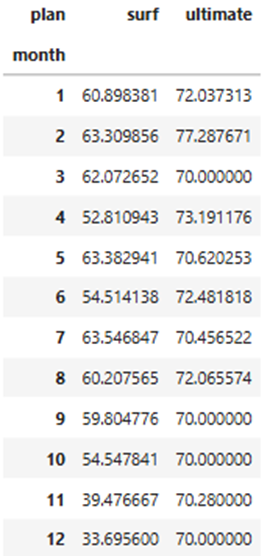 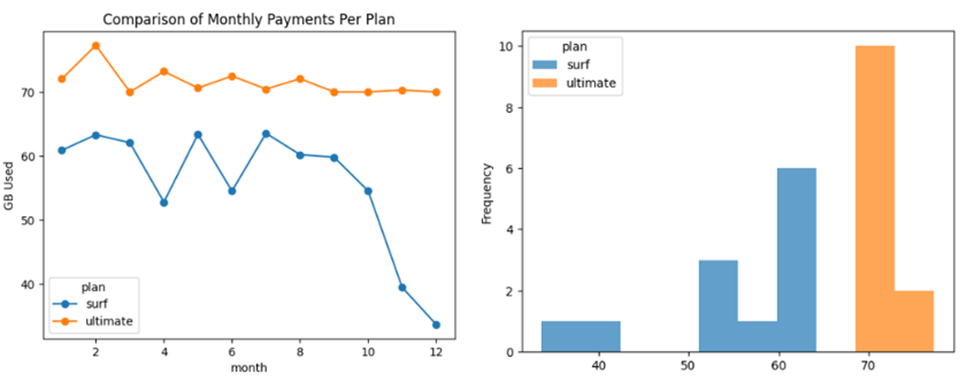
- On average, surf users are spending less than Ultimate users
- Surf users have a large dispersion
- Almost all Ultimate users are paying less than 113 dollars a month while roughly 16% of surf users are paying more than 113 dollars (this is a rough estimate based on the standard deviation and has not been fully calculated)

**All Users**
- Mean: **62.73405146096816**
- Variance: **2048.3629940086907**
- Standard Deviation: **45.25884437332322**
- Median: **70**

**Surf Users**
- Mean: **58.455931341385885**
- Variance: **2875.8133128802197**
- Standard Deviation: **53.626610119232964**
- Median: **40**

**Ultimate Users**
- Mean: **72.08055555555555**
- Variance: **113.2712885802469**
- Standard Deviation: **10.642898504648388**
- Median: **70**

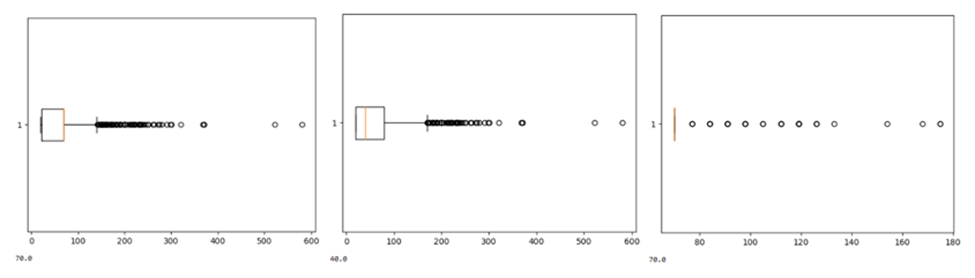
- With this range in data, I would conclude that the ultimate plan gives users more leeway when accruing extra costs. This data and previous data shows that internet usage is the main reason users are exceeding their limits on the surf plan. Overall, it would be a much safer choice to choose the Ultimate plan. I would advise users to choose the ultimate plan if they are going to use their plan for internet usage, but if users will only use their plan for texts and calls then it's safe to choose the surf plan as the exceeding limits costs are insignificant.
- With close to 100% of users on the ultimate plan paying under 105 dollar and almost 100% of users on the surf plan paying close to 220 dollars and under; the ultimate plan is safer to choose.
- If users are not able to afford 70 dollars per month, I would advise that they call their provideer to check their usages.

**Used the sum of the total revenue**

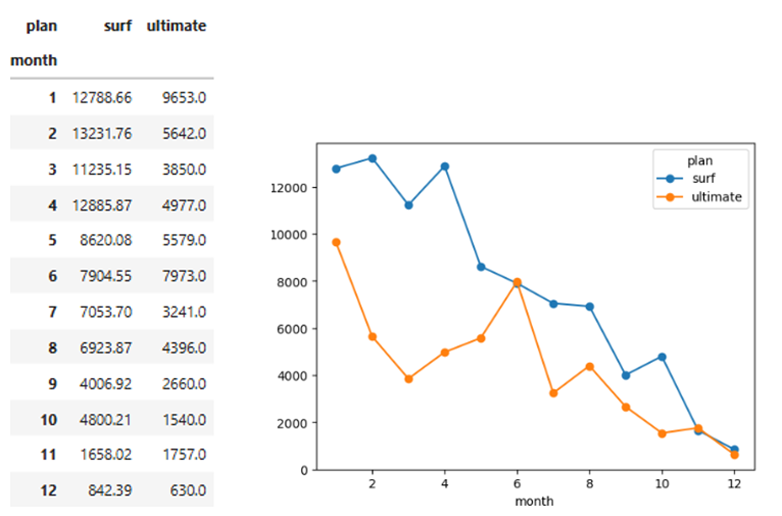

Overall, the surf plan brings in more total revenue.
- Keep in mind there are about double the surf users than ultimate users
- Not enough surf users exceed their plan for a revenue advantage
- If there were a similar number of ultimate users the ultimate plan would make more revenue
- It seems that if there were more ultimate users then the ultimate plan would make more revenue
- Potential fixes to this issue is to incentivise new users to choose the ultimate plan
- The company could wave the monthly fee for the first month if they sign up for the ultimate plan
- The company could raise the monthly cost for surf users
- The company could advertise unlimited call and text messaging since no user has gotten close to exceeding 1000 texts.
- There are several incentives the company could use to their advantage that wouldn't cost them or hardly cost them.
A more expensive plan needs to be more attractive than a less expensive plan which here is true, but when customers are primarily looking at the monthly cost they see a quick difference of 240 dollars a year vs. 840 dollars a year. For this you need to understand human behavior. Since we rarely see limits exceeding enough in text or call usage for it to make a difference to a surf user, the company may want to raise the cost limit for surf users.
- Call usage is almost identical with almost all users on both plans rarely exceeding over 1100 minutes which is 33 extra dollars for surf users
- For text usage almost 100% of all users do not exceed 200 texts which is only 6 dollars for surf users
- For internet usage almost 100% of all users use 35GB or less of data which is 200 dollars for surf users

**Compare to Surf Limit:**
- 60% of users do not exceed 500 minutes
    - 60% surf users do not exceed 500 minutes
    - 60% ultimate users do not exceed 500 minutes
- 67% of users do not exceed 50 messages
    - 80% surf users do not exceed 50 messages
    - 62% ultimate users do not exceed 50 messages
- 43% of users do not exceed 15GB of data
    - 44% of surf users do not exceed 15GB of data
    - 41% of ultimate users do not exceed 15GB of data
- 37% of users pay 20 dollars a month for service
    - 26% of surf users pay 20 dollars a month for service
    - 0% of ultimate users pay 20 dollars a month for service

**Compare with Ultimate Limit**
- 45% pay 70 dollars or less a month for service
    - 43% of surf users pay 70 dollars or less a month for service
    - 57% of ultimate users pay 70 a month for service
- 99.7% of users only use 1,138.09 minutes
    - 99.7% of surf users only use 1131.89 minutes
    - 99.7% of ultimate users only use 1,151.47 minutes
- 99.7% of users use 135 texts or less
    - 99.7% of surf users use 131.84 texts or less
    - 99.7% of ultimate users use 141.77 texts or less
- 93.85% use 30 GB of data or less
    - 93.85% of surf users use 30GB of data or less
    - 93.85% of ultimate users use 30GB of data or less

We can see that internet usage will be most costly for surf users; let's see data for usage of **20GB or less**
- 35% of users use 20GB of data or less (65% use more)
    - 34% of surf users use 20GB of data or less (66% use more)
    - 37% of ultimate users use 20GB of data or less (63% use more)

**Final Thoughts**

All of this data to show that adjustments could be made to increase revenue. We can see with just the surf users using more than 20GB of data is helping to increase revenue. There are about 66% of surf users using more than 20GB of data which increases their bill to over 70$. However, when the data is put together for total revenue we can see that on average, surf users are spending less a month on their plan.
The company should keep the data usages the same as it looks like there is plenty of usage for surf users, but if the company wants to increase revenue they may consider incentives to join the ultimate plan or adjust pricing for the surf plan.

The highest contributing factor of revenue is the base pay of the plan at around 57% and $81,860 while additional charges make up around 43% at around 61989 dollars. The reason the additional charges have a high percentage is due to internet usage, but this information tells the company that they want to promote the ultimate plan.


### **Statistical Testing**

**Surf vs. Ultimate Plan**

Use the Hypothesis on the Equality of Two Populations Means T-test 

Reason: We are comparing the average monthly revenue between surf users and ultimate plan users; we are comparing customers from 2 different plans

- H0 = There is no difference for the average revenue from users of the Ultimate and Surf calling plans.
- H1 = The average revenue from users of the Ultimate and Surf calling plans differ

- **Mean(Surf):** 58.455931341385885
- **Mean(Ultimate):** 72.08055555555555

- **p-value:** 1.3745258979284901e-21

We reject the null hypothesis
- There is a significant difference between users of each plan.
- There's an extremely small chance of getting no difference for the average revenue from users of the Ultimate and Surf calling plans.

**Conclusion:** There is a very strong significant difference for the average revenue from users of the Ultimate and Surf calling plans.


**NY-NJ Only Vs. Other**

Use the Hypothesis on the Equality of Two Populations Means T-test 

Reason: We are comparing the average monthly revenue between NY-NJ users with other regions; we are comparing customers in 2 regions: NY-NJ and Other Regions

- H0 = Average revenue from users in the NY-NJ area is NOT different from users in other regions
- H1 = The average revenue from users in NY-NJ area is different from users in other regions

- **Mean of NY-NJ users:** 58.31923076923078
- **Mean of other regions users:** 63.602729645093945
- **p-value:** 0.03828262811963659

We reject the null hypothesis
- There is a significant difference NY-NJ users and users of other regions
- There's a low chance of getting no difference for the average revenue for NY-NJ users and user of other regions.

**Conclusion:** There is a significant difference for users in NY-NJ regions compared to other regions.
- It would be interesting to see the difference between rural areas and cities; I would guess that city users have greater usage than rural users.


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Fantastic!

### Percent by Category

**Internet**

- 489 internet users
- Extra Internet: 58,758
- Total Revenue: 143849.18
- Percent Extra Internet: ~40.85%

In [78]:
sum_internet = df_limited['total_usage_gb'].sum()
display(sum_internet)

total_revenue = df_limited['monthly_revenue'].sum()
display(total_revenue)

percent_internet = sum_internet / total_revenue * 100
display(percent_internet)

58758.0

143849.18

40.84694817168927

**Call**

- 481 callers
- Extra Call: 2900.25
- Total Revenue: 143849.18
- Percent Extra Call: ~2.02

In [79]:
sum_call = df_limited['total_usage_call'].sum()
display(sum_call)

display(total_revenue)

percent_call = sum_call / total_revenue * 100
display(percent_call)

2900.25

143849.18

2.016174162410936

**Messages**

- 402 message users
- Extra Text = 330.92999999999995
- Total Revenue = 143,849.18
- Percent Extra Text = ~ 0.23%

In [80]:
sum_message = df_limited['total_usage_message'].sum()
display(sum_message)

display(total_revenue)

percent_message = sum_message/total_revenue * 100
display(percent_message)


330.92999999999995

143849.18

0.23005344903599725

**Base Pay vs. Extra Costs**

- Monthly Pay: 81860
- Monthly Extra: 61989.18
- Percent Monthly Pay: 56.91%
- Percent Total Extra: 43.09%

In [81]:
extra_total = sum_call + sum_message + sum_internet
display(extra_total)


display(total_revenue)

monthly_total = total_revenue - extra_total
display(monthly_total)


monthly_total_percent = monthly_total / total_revenue * 100
display(monthly_total_percent)

extra_total_percent = extra_total / total_revenue * 100
display(extra_total_percent)

61989.18

143849.18

81860.0

56.906824216863804

43.0931757831362

**ALL**

**Total Revenue:**
- Total Revenue: 143849.18

**Extra Internet Cost for Revenue**
- Extra Internet: 38,031
- Percent Extra Internet: ~26.44%

**Extra Call Cost for Revenue**
-  Extra Call: 2900.25
- Percent Extra Call: ~2.02

**Extra Text Cost for Revenue**
- Extra Text = 330.92999999999995
- Percent Extra Text = ~ 0.23%

**Base Pay vs. Extra Cost for Revenue**
- Monthly Pay: 81860
- Monthly Extra: 61989.18
- Percent Monthly Pay: 56.91%
- Percent Total Extra: 43.09%

**Breakdown of Categories**
- Internet: ~40.85%
- Call: ~2.02
- Text: ~0.23
- Monthly: ~56.91
- **Total:** ~100%
- Monthly: ~56.91%
- Extra: ~43.09%
- **Total:** 100%

This breakdown shows that monthly pay and internet usage are the primary sources of revenue

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job!